In [4]:
#If we take a look at the current distribution, we can compare which countries were in 2022 that might not have been in 2013
current = df.loc[df['UNDERWRITING_YEAR'] == 2022]
current = current[['CONTRACT_NO','COUNTRY']].drop_duplicates()
#Counting the number of unique contract per country in this year

NameError: name 'df' is not defined

## Nepal Breakdown

In [15]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/tkmwangi/Documents/Data/COMBINED_SICS_RMS_DMP_ORG.csv')
df.info()

C:\Users\tkmwangi\AppData\Local\Temp\ipykernel_15700\4116142569.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/tkmwangi/Documents/Data/COMBINED_SICS_RMS_DMP_ORG.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190332 entries, 0 to 190331
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CONTRACT_NO                  190332 non-null  object 
 1   UNDERWRITING_YEAR            190332 non-null  int64  
 2   IS_INWARD                    190332 non-null  object 
 3   INCEPTION_DATE               190332 non-null  object 
 4   EXPIRY_DATE                  190332 non-null  object 
 5   TYPE_OF_BUSINESS             190332 non-null  object 
 6   ACT_LOB                      190332 non-null  object 
 7   CEDENT_ID                    190332 non-null  object 
 8   CEDENT_NAME                  190332 non-null  object 
 9   BROKER_ID                    190332 non-null  object 
 10  BROKER_NAME                  190332 non-null  object 
 11  CEDENT_COUNTRY               190332 non-null  object 
 12  TYPE_OF_PARTICIPATION        190322 non-null  object 
 13 

In [16]:
df['CEDENT_COUNTRY'].value_counts()
nepal_only = df.loc[df['CEDENT_COUNTRY'] == 'NEPAL']
#Filtering to only have post 2015 data
nepal_only = nepal_only.loc[nepal_only['UNDERWRITING_YEAR'] >= 2015]
nepal_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9929 entries, 192 to 190294
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CONTRACT_NO                  9929 non-null   object 
 1   UNDERWRITING_YEAR            9929 non-null   int64  
 2   IS_INWARD                    9929 non-null   object 
 3   INCEPTION_DATE               9929 non-null   object 
 4   EXPIRY_DATE                  9929 non-null   object 
 5   TYPE_OF_BUSINESS             9929 non-null   object 
 6   ACT_LOB                      9929 non-null   object 
 7   CEDENT_ID                    9929 non-null   object 
 8   CEDENT_NAME                  9929 non-null   object 
 9   BROKER_ID                    9929 non-null   object 
 10  BROKER_NAME                  9929 non-null   object 
 11  CEDENT_COUNTRY               9929 non-null   object 
 12  TYPE_OF_PARTICIPATION        9929 non-null   object 
 13  INSURED_NAME       

### Lets get an overview of our data

<Axes: xlabel='ACT_LOB', ylabel='Count'>

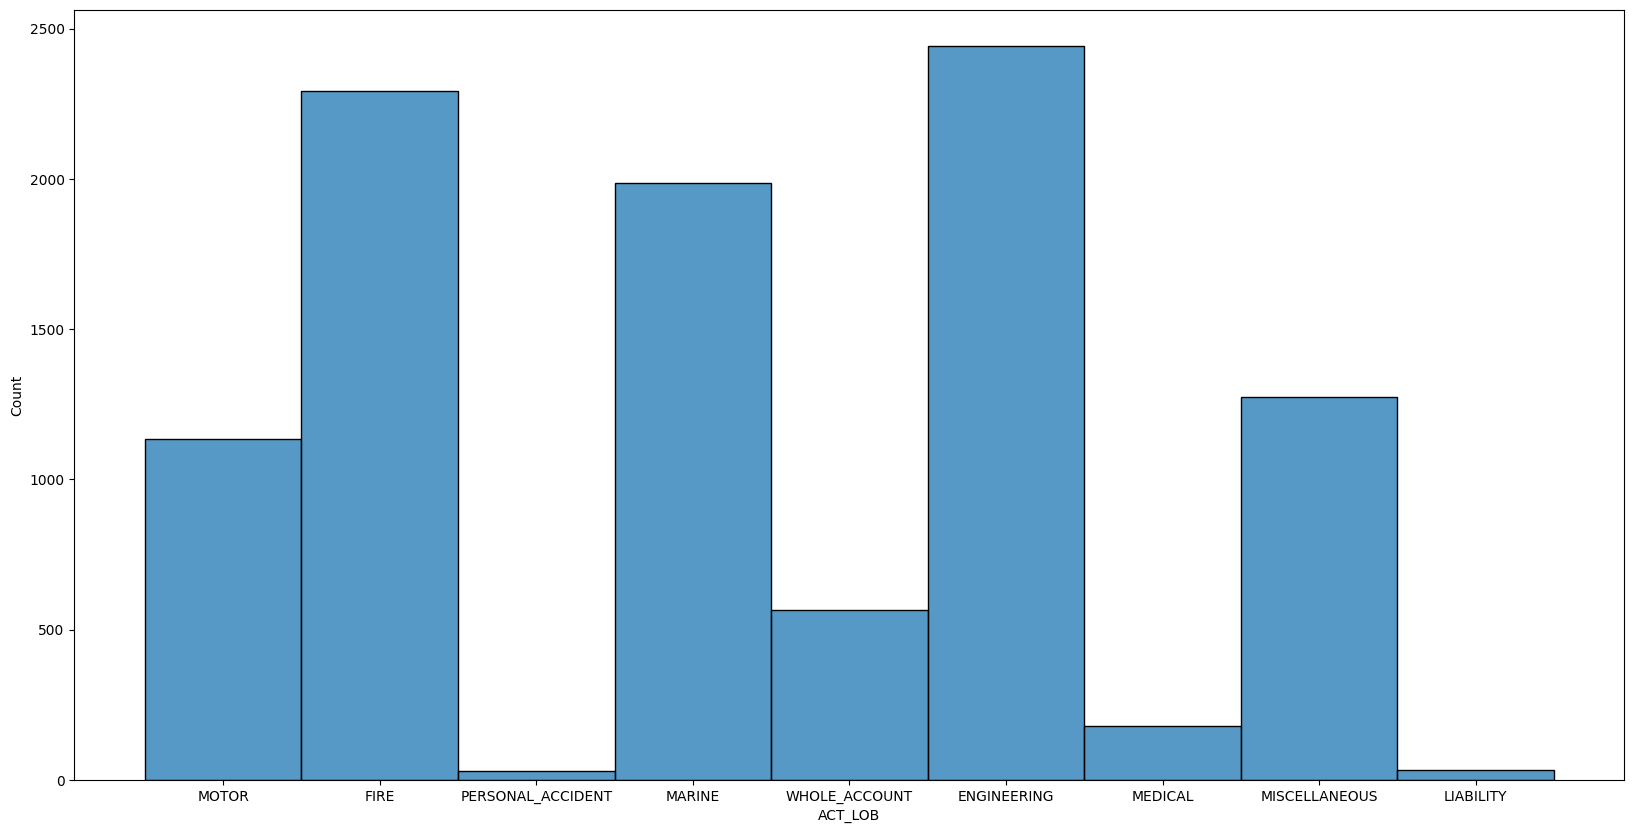

In [17]:
plt.figure(figsize=(20,10))
sn.histplot(nepal_only['ACT_LOB'])

<Axes: xlabel='TYPE_OF_BUSINESS', ylabel='Count'>

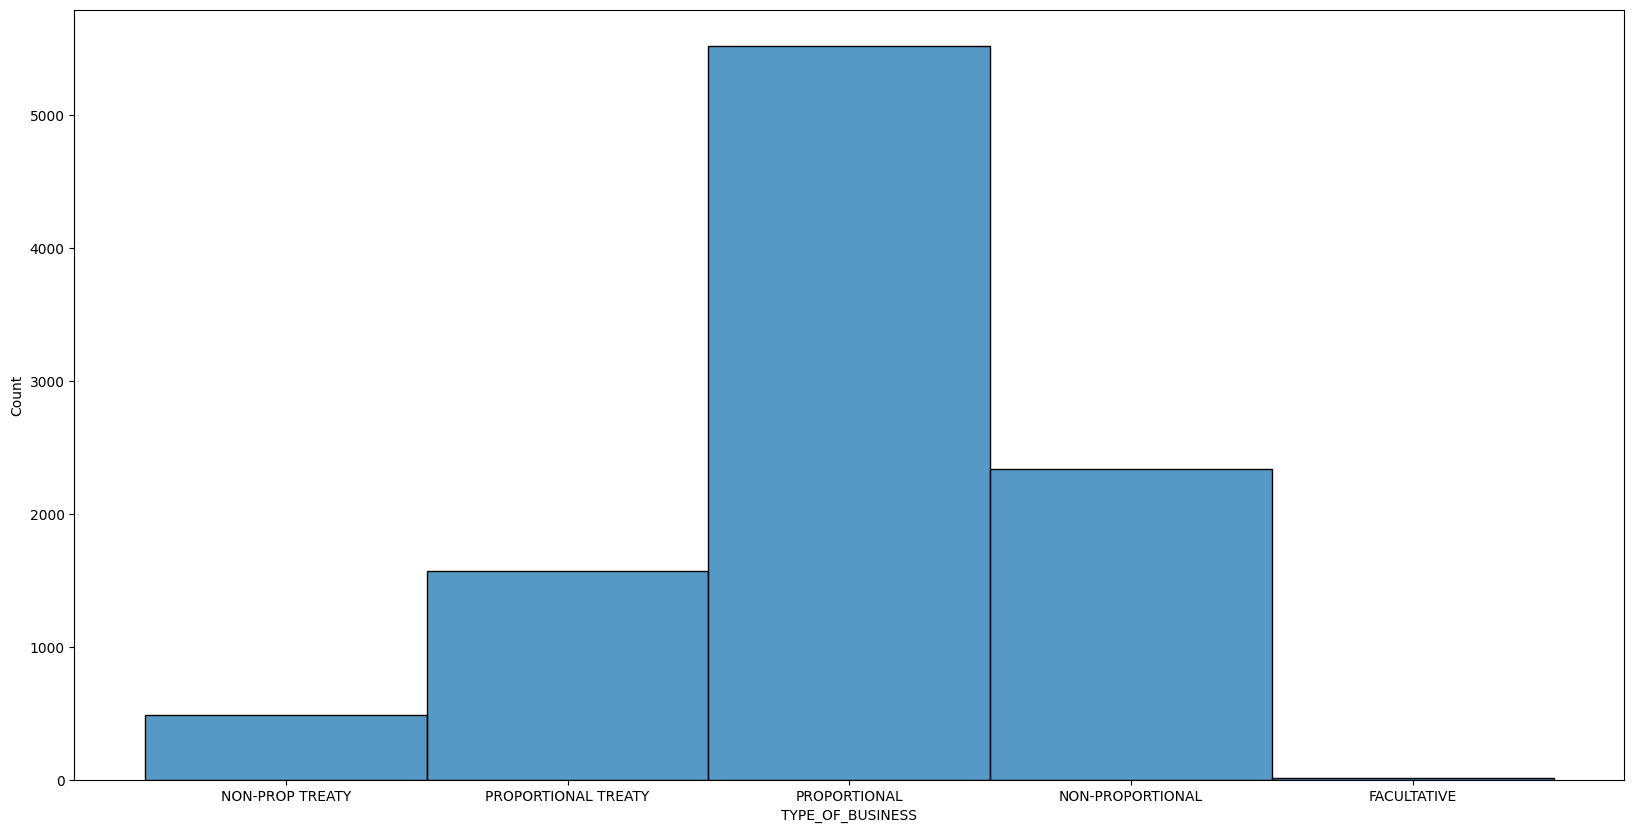

In [18]:
plt.figure(figsize=(20,10))
sn.histplot(nepal_only['TYPE_OF_BUSINESS'])

In [19]:
nepal_only['TYPE_OF_PARTICIPATION'].value_counts()

TYPE_OF_PARTICIPATION
SURPLUS                         2926
QUOTA SHARE                     2286
Surplus                          819
Quota Share                      722
XL-RISK FIRST                    526
XL-RISK SECOND                   306
Excess Of Loss                   258
SURPLUS FIRST                    245
Catastrophe XL Per Event         176
XL-RISK THIRD                    176
XL-CAT FIRST                     175
XL-CAT SECOND                    159
XL-RISK                          157
XL-CAT THIRD                     144
XL-CAT FOURTH                     99
XL-RISK FOURTH                    93
XL-CAT FIFTH                      82
XL-RISK/CAT FIRST                 76
XL-RISK/CAT THIRD                 71
XL-RISK/CAT SECOND                66
FAC OBLIGATORY                    61
XL-RISK/CAT FIFTH                 52
Working XL Per Risk Or Event      50
XL-CAT SIXTH                      39
XL-RISK/CAT FOURTH                39
XL-RISK FIFTH                     34
Surplus 1       

In [20]:
print('There are number 14 total cedants from nepal')
#Replacing repeated cedant names that are duplicated
nepal_only['CEDENT_NAME'] = nepal_only['CEDENT_NAME'].replace('GENERAL INSURANCE COMPANY LIMITED NEPAL', 'GENERAL INSURANCE COMPANY LIMITED, NEPAL')
nepal_only['CEDENT_NAME'] = nepal_only['CEDENT_NAME'].replace('AJOD INSURANCE LIMITED NEPAL', 'AJOD INSURANCE LIMITED, NEPAL')
nepal_only['CEDENT_NAME'] = nepal_only['CEDENT_NAME'].replace('IME GENERAL INSURANCE COMPANYNEPAL', 'IME GENERAL INSURANCE COMPANY,NEPAL')
nepal_only['CEDENT_NAME'] = nepal_only['CEDENT_NAME'].replace('PRABHU INSURANCE LIMITEDNEPAL','PRABHU INSURANCE LIMITED,NEPAL')
nepal_only['CEDENT_NAME'].value_counts().count()

There are number 14 total cedants from nepal


14

## Let's now get into the details, the plan is to find out which cedants/business is profitable or not

1. Well split it by year and focus on the profitability by cedant for each year from 2015 to present
2. Then split it by cedant and Line of business

* Something to note is that the CAT business is already known to be over-exposed so well treat those as outliers 
* We will also create a inflow and outflow column to be used later on

In [21]:
nepal_only['Inflows'] = nepal_only['BOOKED_PREMIUM'] + nepal_only['INTEREST_ON_DEPOSITS'] + nepal_only['PREMIUM_PORTFORLIO_IN'] 
nepal_only['Outflows'] = nepal_only['COMMISSION'] + nepal_only['BROKERAGE'] +nepal_only['PROFIT_COMMISSION'] + nepal_only['TAX_ON_INTEREST']  + nepal_only['OTHER_CHARGES'] + nepal_only['OVERRIDER_COMMISSION'] + nepal_only['CLAIM_PAID'] + nepal_only['PREMIUM_PORTFORLIO_OUT'] + nepal_only['OUTSTANDING_LOSSES'] + nepal_only['MANAGEMENT_EXPENSES']
nepal_only['Diff'] = nepal_only['Inflows'] - nepal_only['Outflows']
# Dropping the columns to make it easier to keep track of
columns_to_drop = ['BOOKED_PREMIUM', 'COMMISSION','INTEREST_ON_DEPOSITS','BROKERAGE','PREMIUM_PORTFORLIO_IN','PROFIT_COMMISSION','TAX_ON_INTEREST','OTHER_CHARGES','OVERRIDER_COMMISSION','CLAIM_PAID','PREMIUM_PORTFORLIO_OUT','OUTSTANDING_LOSSES','MANAGEMENT_EXPENSES']
nepal_only = nepal_only.drop(columns_to_drop, axis=1)

<Axes: xlabel='UNDERWRITING_YEAR', ylabel='Inflows'>

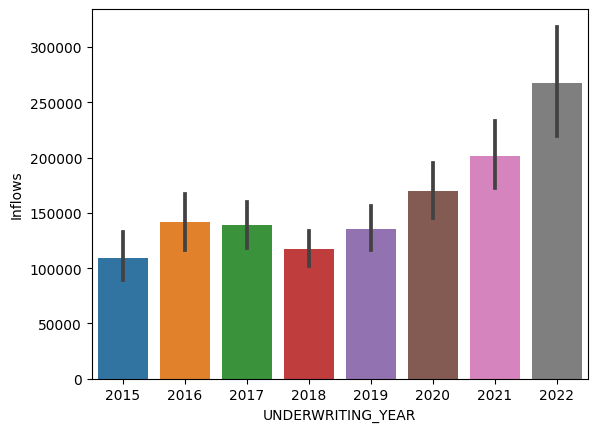

In [22]:
#For an overview of inflows
sn.barplot(y = nepal_only['Inflows'], x = nepal_only['UNDERWRITING_YEAR'], data=nepal_only)

<Axes: xlabel='UNDERWRITING_YEAR', ylabel='Outflows'>

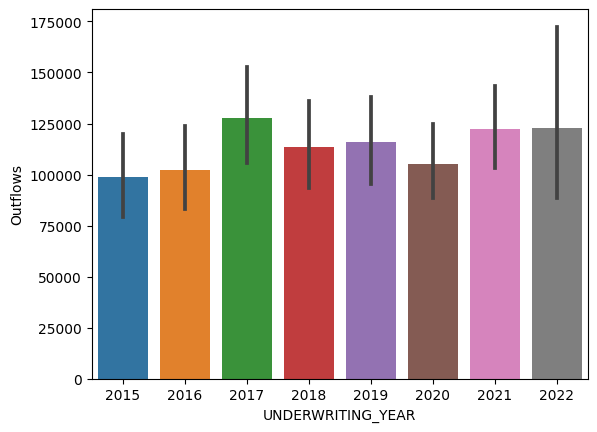

In [23]:
#For an overview of outflows
sn.barplot(y = nepal_only['Outflows'], x = nepal_only['UNDERWRITING_YEAR'], data=nepal_only)


 The graph indicates that the distribution of diff values has been quite similar over the period in question. 
 With most values being near zero, with the negative values having a large range than the positive values

 The largest positive value is  6749549.76  with the largest negative value being  -15478234.0

 
 The statistical analysis of the difference in inflows vs outflows is as follows count    9.929000e+03
mean     3.400547e+04
std      4.649218e+05
min     -1.547823e+07
25%     -5.696000e+03
50%      1.508370e+03
75%      8.425996e+04
max      6.749550e+06
Name: Diff, dtype: float64


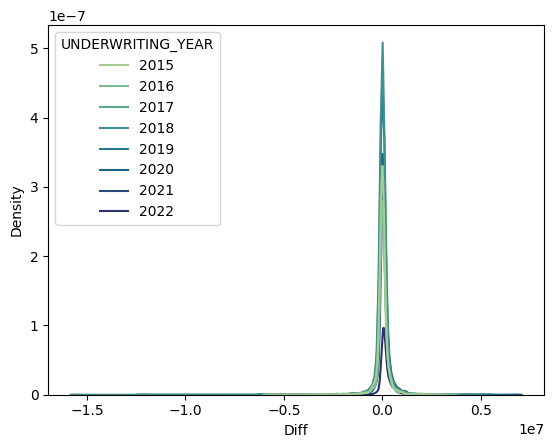

In [24]:
sn.kdeplot(x = nepal_only['Diff'], hue=nepal_only['UNDERWRITING_YEAR'], palette="crest")
print('\n The graph indicates that the distribution of diff values has been quite similar over the period in question. \n With most values being near zero, with the negative values having a large range than the positive values')
max_diff = nepal_only['Diff'].max()
min_diff = nepal_only['Diff'].min()
print('\n The largest positive value is ', max_diff, ' with the largest negative value being ',min_diff)

ds = nepal_only['Diff'].describe()
print('\n \n The statistical analysis of the difference in inflows vs outflows is as follows',ds)

### Lets begin drilling down year by year

In [25]:
# Create an empty dictionary to store the DataFrames
nepal_years = {}

# Iterate over unique years in the 'UNDERWRITING_YEAR' column
for year in nepal_only['UNDERWRITING_YEAR'].unique():
    # Filter the DataFrame for the current year
    year_df = nepal_only.loc[nepal_only['UNDERWRITING_YEAR'] == year].copy()
    # Add the DataFrame to the dictionary with the year as the key
    nepal_years[year] = year_df

# Access the DataFrames for each year
nepal_2015 = nepal_years[2015]
nepal_2016 = nepal_years[2016]
nepal_2017 = nepal_years[2017]
nepal_2018 = nepal_years[2018]
nepal_2019 = nepal_years[2019]
nepal_2020 = nepal_years[2020]
nepal_2021 = nepal_years[2021]
nepal_2022 = nepal_years[2022]

### 2015

In [26]:
print('There are 116 unique contracts in 2015, from 8 cedants')
print('\n These are:', '\n\n\n The numbers on the right indicate the number of times the cedant name appears in the table')
nepal_2015['CEDENT_NAME'].value_counts()


There are 116 unique contracts in 2015, from 8 cedants

 These are: 


 The numbers on the right indicate the number of times the cedant name appears in the table


CEDENT_NAME
PRUDENTIAL INSURANCE CO LTD            289
SIDDHARTHA INSURANCE CO. LTD. NEPAL    229
NECO INSURANCE CO. LTD                 215
EVEREST INSURANCE CO.LTD               133
PREMIER INSURANCE CO.(NEPAL) LTD.      131
NEPAL INSURANCE LTD.                   131
RASTRIYA BEEMA SANSTHAN                 92
NLG INSURANCE COMPANY LIMITED            2
Name: count, dtype: int64

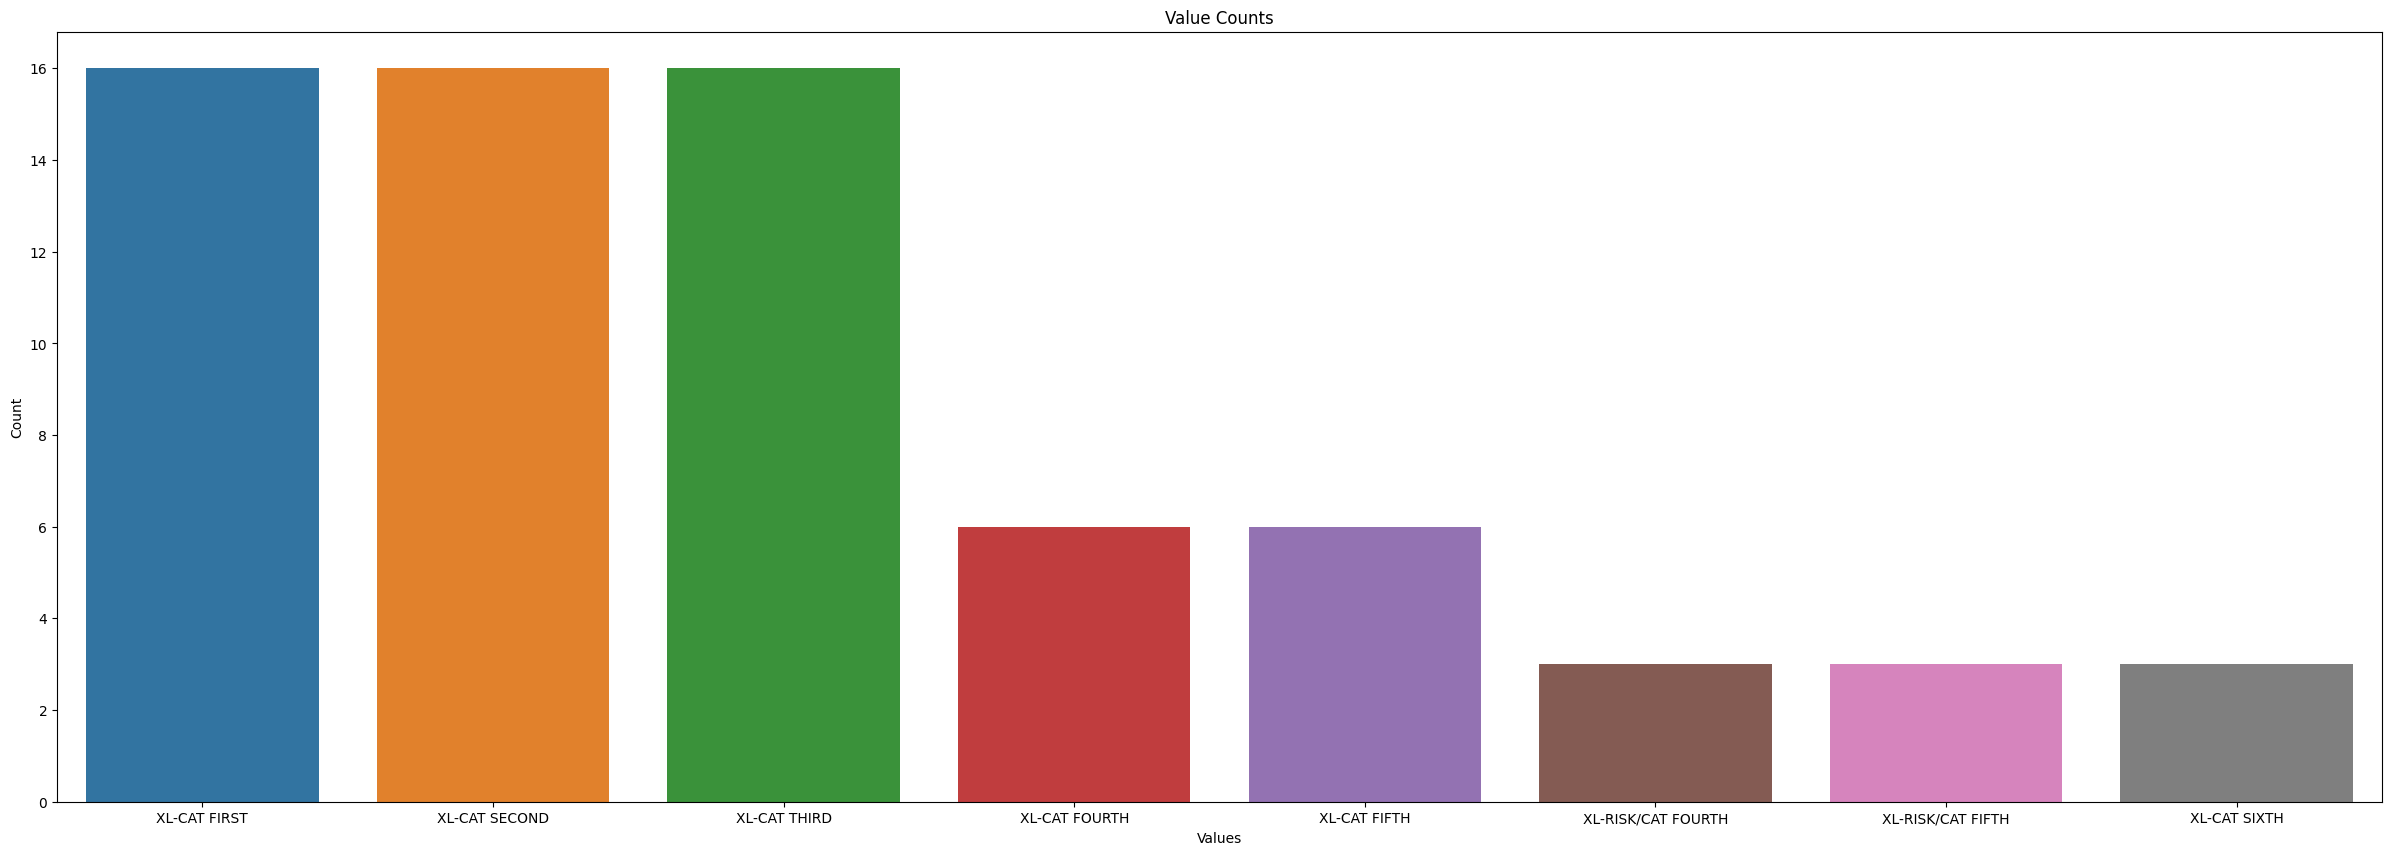

In [27]:
# Create a list of values to filter, specifically anything related to CAT 
remove_list = ['XL-CAT THIRD','XL-CAT SECOND','XL-CAT FIRST','XL-CAT FOURTH','XL-CAT FIFTH','XL-RISK/CAT FOURTH','XL-RISK/CAT FIFTH','XL-CAT SIXTH']

# Remove rows based on the list of values
filtered_nepal_2015 = nepal_2015[nepal_2015['TYPE_OF_PARTICIPATION'].isin(remove_list)]
data = filtered_nepal_2015['TYPE_OF_PARTICIPATION']

# Compute value counts using pandas value_counts()
value_counts = data.value_counts()

# Create a bar plot using Seaborn's barplot()
plt.figure(figsize=(30,10))
sn.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and titles to the plot
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts')

# Display the plot
plt.show()


The frequency of each LOB is as follows  ACT_LOB
FIRE             36
WHOLE_ACCOUNT    30
MOTOR             3
Name: count, dtype: int64


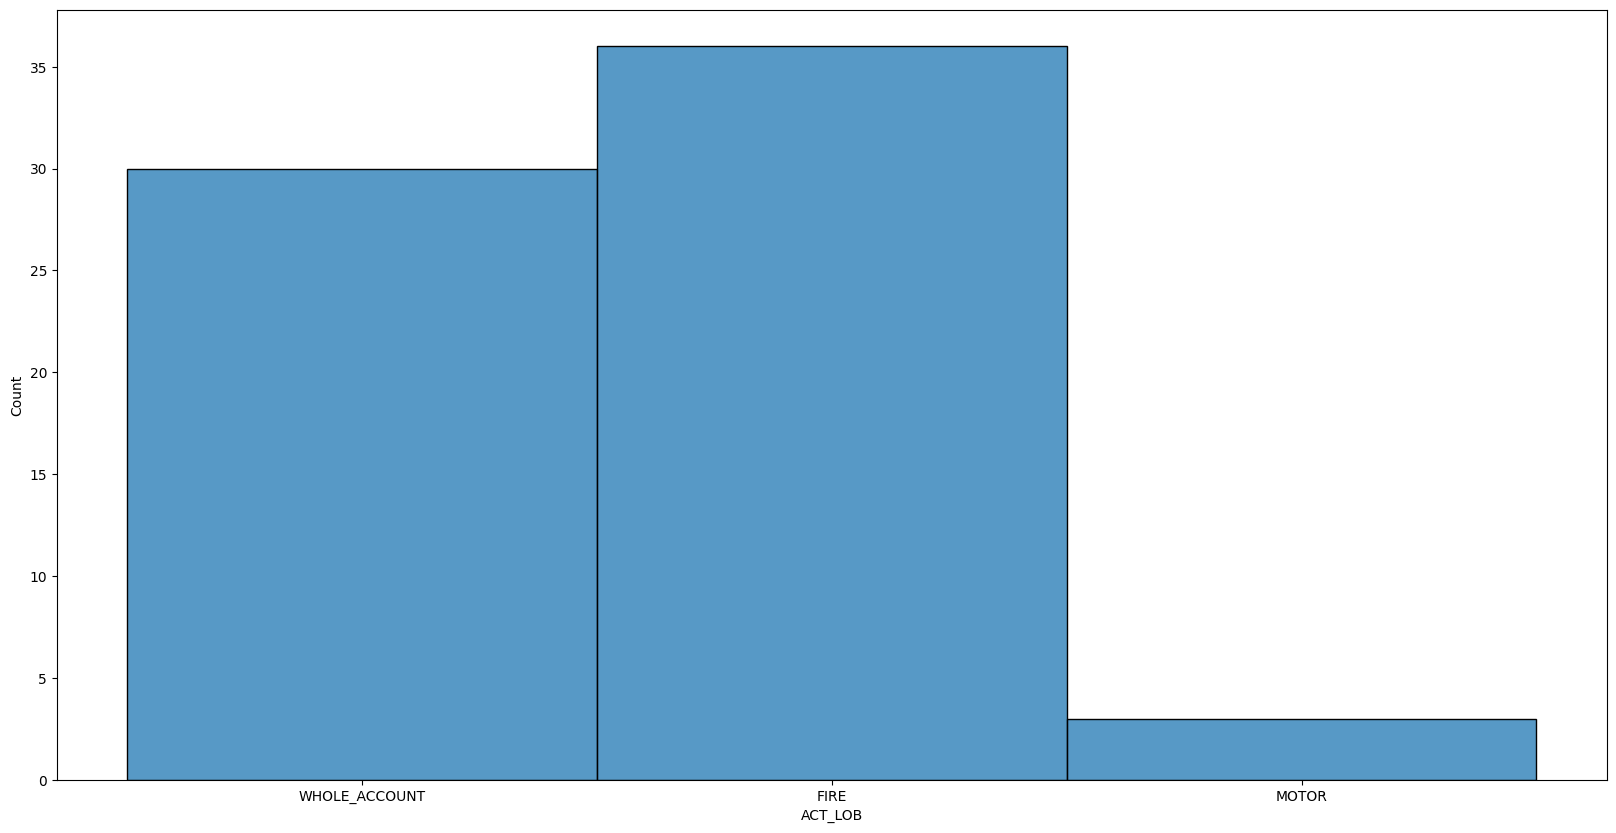

In [28]:
x = filtered_nepal_2015['ACT_LOB'].value_counts()
plt.figure(figsize=(20,10))
sn.histplot(filtered_nepal_2015['ACT_LOB'])
print('The frequency of each LOB is as follows ', x)

In [29]:
filtered_nepal_2015['Diff'].value_counts()
count_negative = (filtered_nepal_2015['Diff'] < 0).sum()
count_positive = (filtered_nepal_2015['Diff'] > 0).sum()
print('The number of negative difference values is: ',count_negative, 'and the number of positive values is: ',count_positive)
print('\n The are more negatives than positives')

The number of negative difference values is:  0 and the number of positive values is:  69

 The are more negatives than positives


### 2016

In [30]:
print('There are 123 unique contracts in 2016, from 8 cedants')
print('\n These are:')
nepal_2016['CEDENT_NAME'].value_counts()

There are 123 unique contracts in 2016, from 8 cedants

 These are:


CEDENT_NAME
SIDDHARTHA INSURANCE CO. LTD. NEPAL    186
NECO INSURANCE CO. LTD                 179
PRUDENTIAL INSURANCE CO LTD            170
EVEREST INSURANCE CO.LTD               139
NEPAL INSURANCE LTD.                   132
PREMIER INSURANCE CO.(NEPAL) LTD.      110
RASTRIYA BEEMA SANSTHAN                 79
NLG INSURANCE COMPANY LIMITED            1
Name: count, dtype: int64

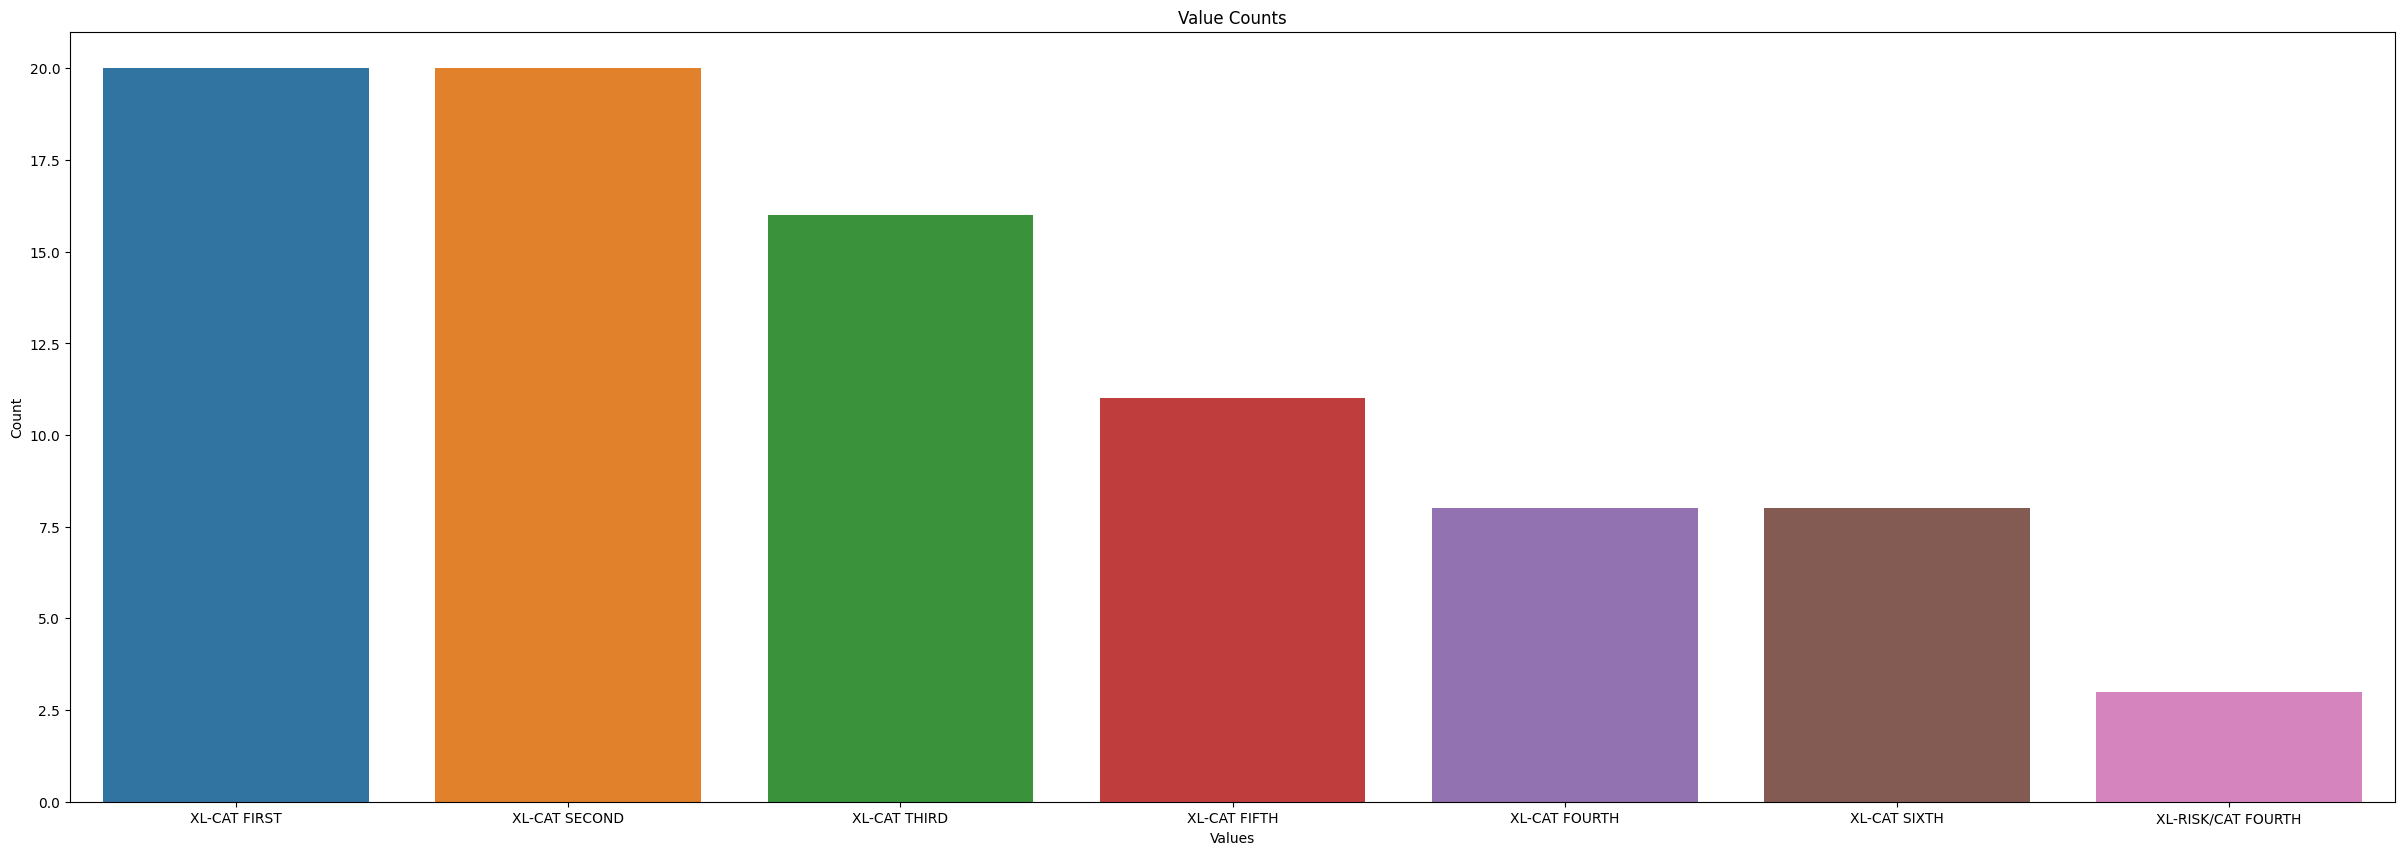

In [31]:
# Create a list of values to filter, specifically anything related to CAT 
remove_list = ['XL-CAT THIRD','XL-CAT SECOND','XL-CAT FIRST','XL-CAT FOURTH','XL-CAT FIFTH','XL-RISK/CAT FOURTH','XL-RISK/CAT FIFTH','XL-CAT SIXTH']

# Remove rows based on the list of values
filtered_nepal_2016 = nepal_2016[nepal_2016['TYPE_OF_PARTICIPATION'].isin(remove_list)]
data = filtered_nepal_2016['TYPE_OF_PARTICIPATION']

# Compute value counts using pandas value_counts()
value_counts = data.value_counts()

# Create a bar plot using Seaborn's barplot()
plt.figure(figsize=(30,10))
sn.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and titles to the plot
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts')

# Display the plot
plt.show()


The frequency of each LOB is as follows  ACT_LOB
FIRE             50
WHOLE_ACCOUNT    30
MARINE            6
Name: count, dtype: int64


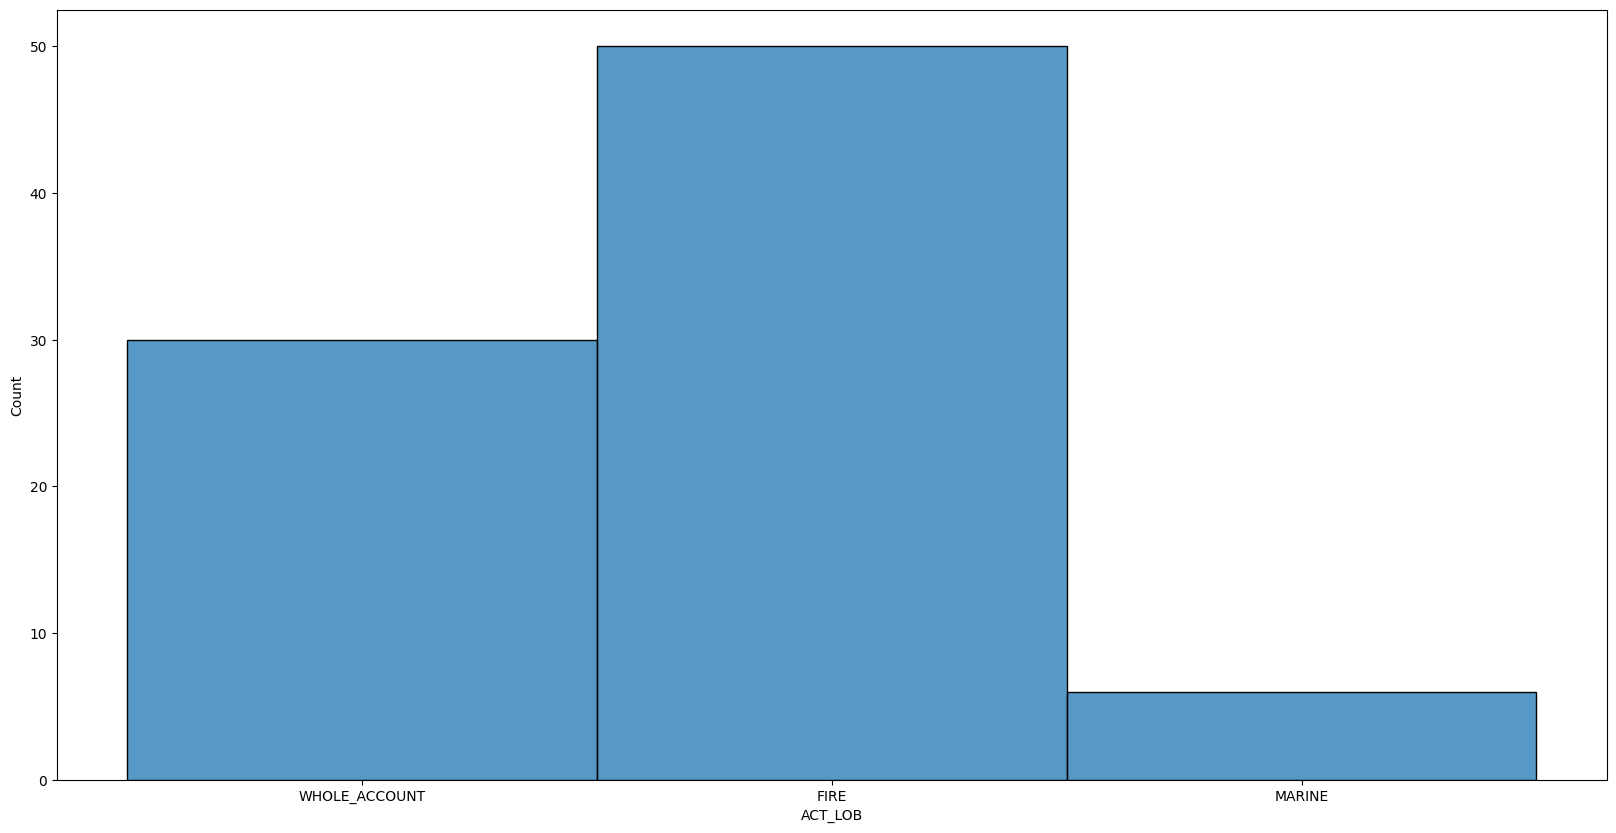

In [32]:
x = filtered_nepal_2016['ACT_LOB'].value_counts()
plt.figure(figsize=(20,10))
sn.histplot(filtered_nepal_2016['ACT_LOB'])
print('The frequency of each LOB is as follows ', x)

In [33]:
filtered_nepal_2016['Diff'].value_counts()
count_negative = (filtered_nepal_2016['Diff'] < 0).sum()
count_positive = (filtered_nepal_2016['Diff'] > 0).sum()
print('The number of negative difference values is: ',count_negative, 'and the number of positive values is: ',count_positive)
print('\n The are more positives than negatives')

The number of negative difference values is:  0 and the number of positive values is:  86

 The are more positives than negatives


### 2017

In [34]:
print('There are 133 unique contracts in 2017, from 8 cedants')
print('\n These are:')
nepal_2017['CEDENT_NAME'].value_counts()


There are 133 unique contracts in 2017, from 8 cedants

 These are:


CEDENT_NAME
SIDDHARTHA INSURANCE CO. LTD. NEPAL    194
EVEREST INSURANCE CO.LTD               191
NECO INSURANCE CO. LTD                 176
PRUDENTIAL INSURANCE CO LTD            174
PREMIER INSURANCE CO.(NEPAL) LTD.      141
NEPAL INSURANCE LTD.                   138
RASTRIYA BEEMA SANSTHAN                 87
HIMALAYAN GENERAL INSURANCE CO LTD       7
Name: count, dtype: int64

In [35]:
print('There are 133 unique contracts in 2017, from 8 cedants')
print('\n These are:', '\n\n\n The numbers on the right indicate the number of times the cedant name appears in the table')
nepal_2017['CEDENT_NAME'].value_counts()

There are 133 unique contracts in 2017, from 8 cedants

 These are: 


 The numbers on the right indicate the number of times the cedant name appears in the table


CEDENT_NAME
SIDDHARTHA INSURANCE CO. LTD. NEPAL    194
EVEREST INSURANCE CO.LTD               191
NECO INSURANCE CO. LTD                 176
PRUDENTIAL INSURANCE CO LTD            174
PREMIER INSURANCE CO.(NEPAL) LTD.      141
NEPAL INSURANCE LTD.                   138
RASTRIYA BEEMA SANSTHAN                 87
HIMALAYAN GENERAL INSURANCE CO LTD       7
Name: count, dtype: int64

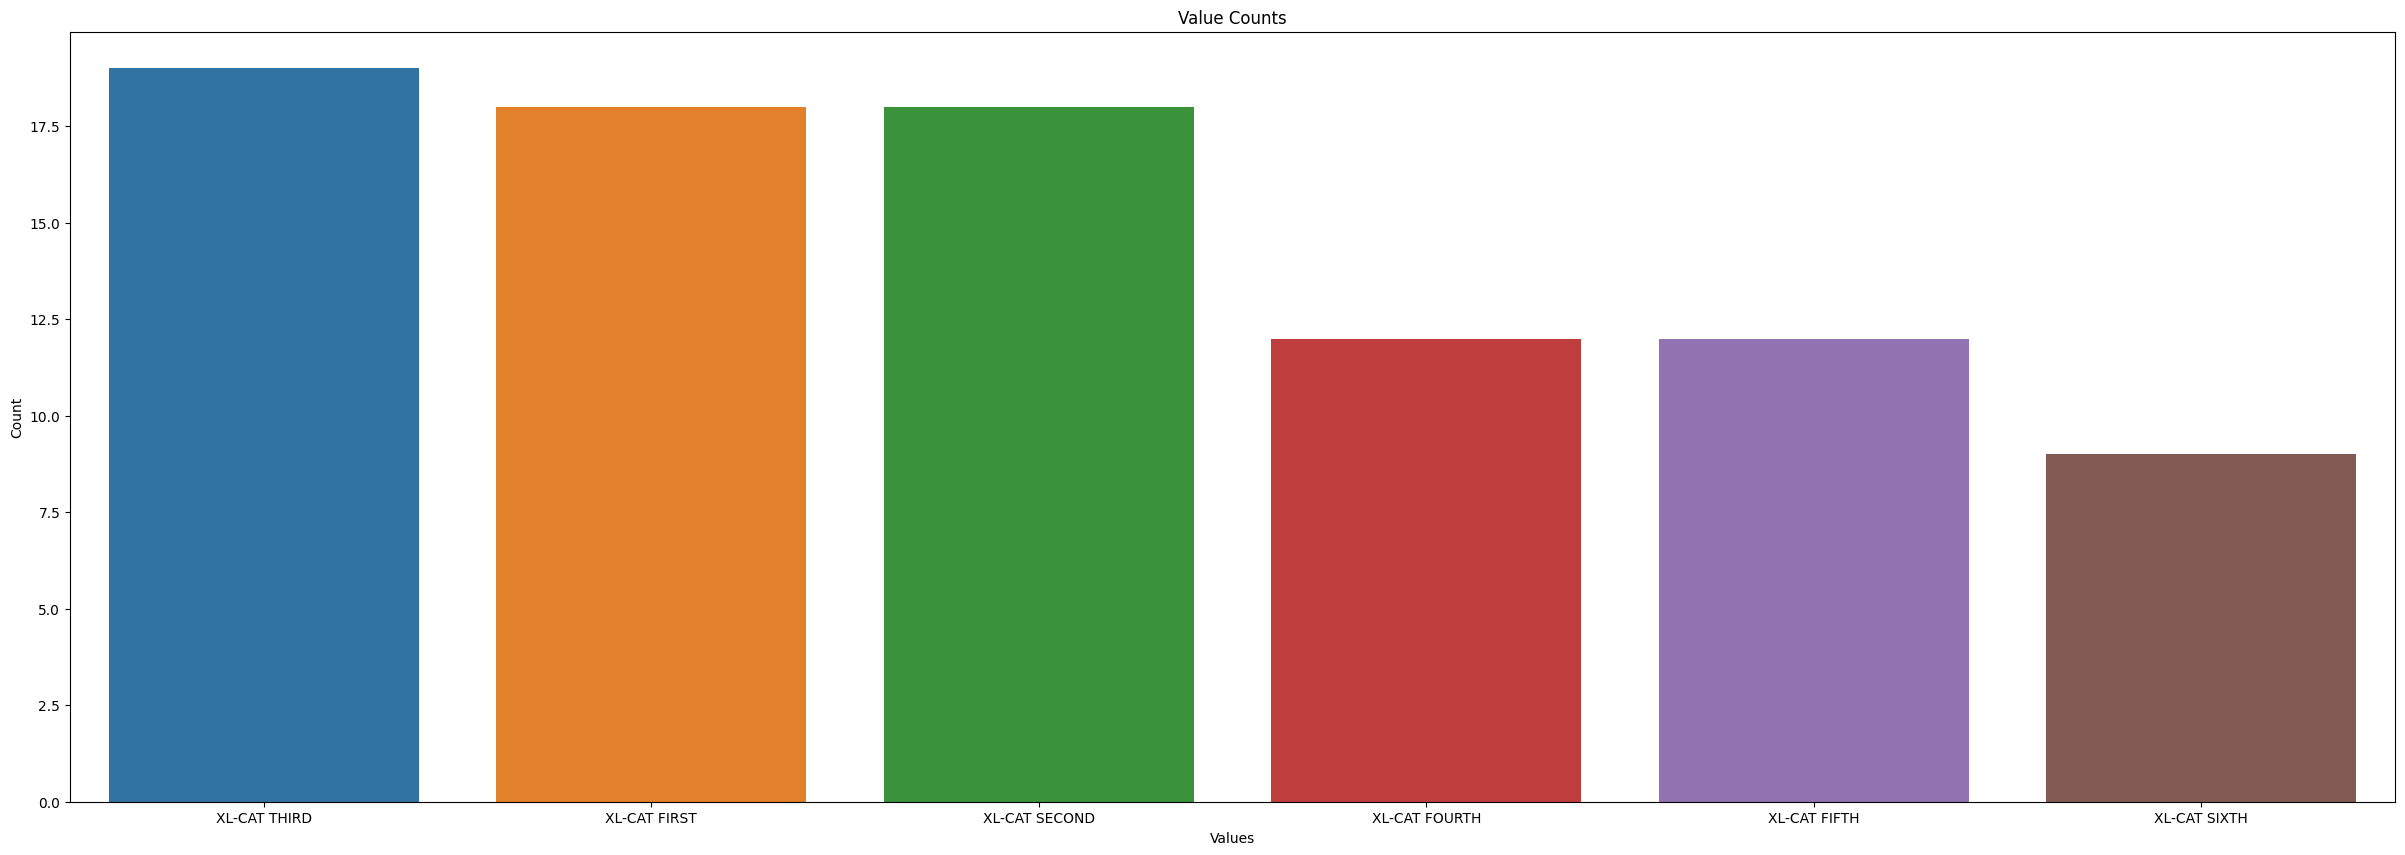

In [36]:
# Create a list of values to filter, specifically anything related to CAT 
remove_list = ['XL-CAT THIRD','XL-CAT SECOND','XL-CAT FIRST','XL-CAT FOURTH','XL-CAT FIFTH','XL-RISK/CAT FOURTH','XL-RISK/CAT FIFTH','XL-CAT SIXTH']

# Remove rows based on the list of values
filtered_nepal_2017 = nepal_2017[nepal_2017['TYPE_OF_PARTICIPATION'].isin(remove_list)]
data = filtered_nepal_2017['TYPE_OF_PARTICIPATION']

# Compute value counts using pandas value_counts()
value_counts = data.value_counts()

# Create a bar plot using Seaborn's barplot()
plt.figure(figsize=(30,10))
sn.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and titles to the plot
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts')

# Display the plot
plt.show()

The frequency of each LOB is as follows  ACT_LOB
FIRE             52
WHOLE_ACCOUNT    36
Name: count, dtype: int64
The number of negative difference values is:  0 and the number of positive values is:  88

 The are more negatives than positives


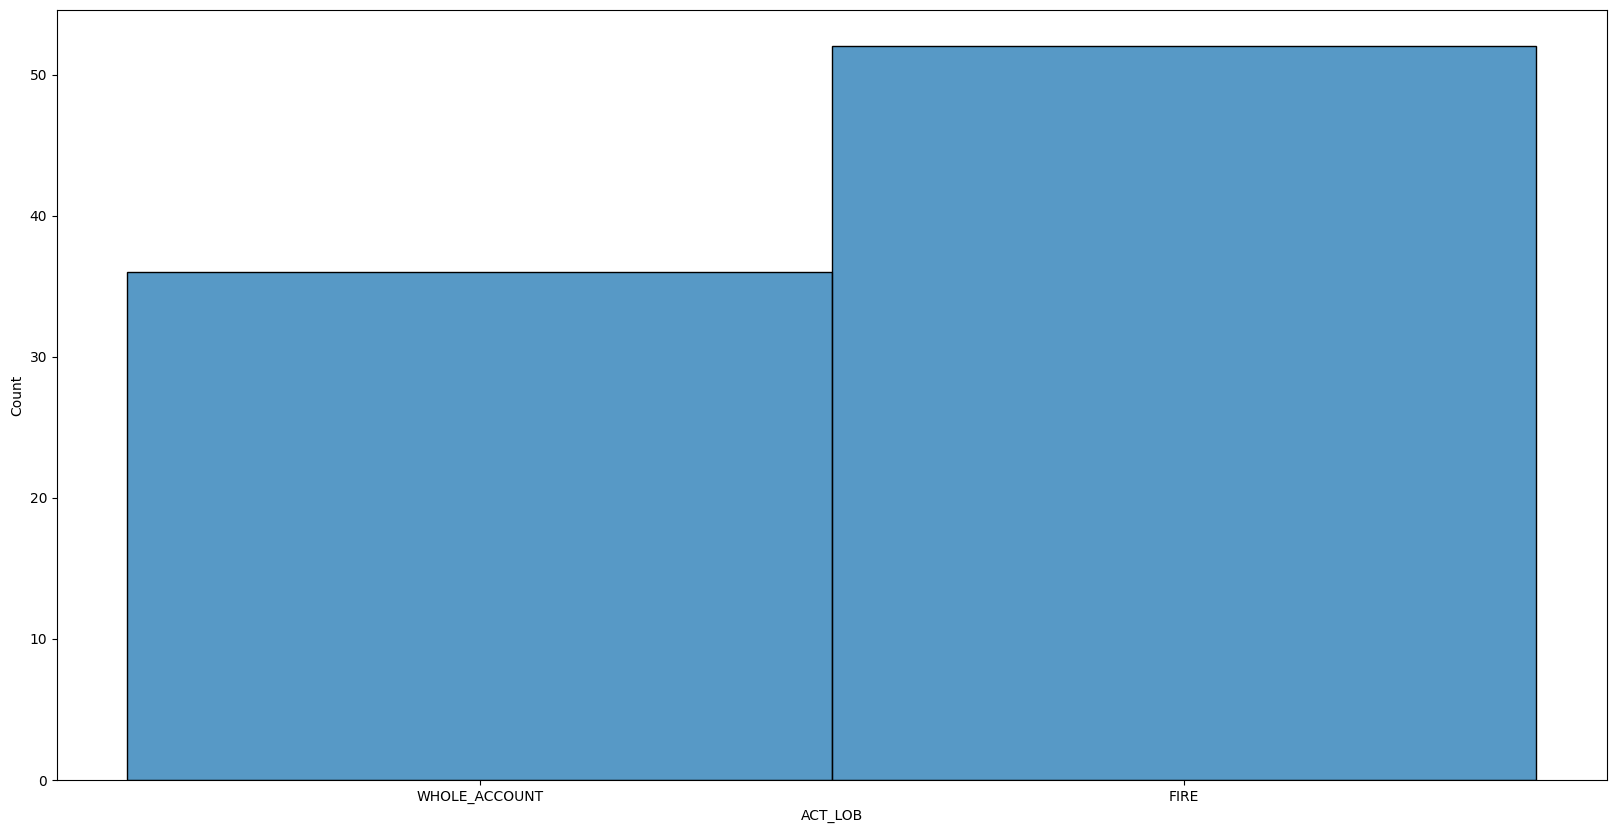

In [37]:
x = filtered_nepal_2017['ACT_LOB'].value_counts()
plt.figure(figsize=(20,10))
sn.histplot(filtered_nepal_2017['ACT_LOB'])
print('The frequency of each LOB is as follows ', x)


filtered_nepal_2017['Diff'].value_counts()
count_negative = (filtered_nepal_2017['Diff'] < 0).sum()
count_positive = (filtered_nepal_2017['Diff'] > 0).sum()
print('The number of negative difference values is: ',count_negative, 'and the number of positive values is: ',count_positive)
print('\n The are more negatives than positives')

### 2018

In [38]:
print('There are 255 unique contracts in 2018, from 17 cedants')
print('\n These are:','\n\n\n *The numbers on the right indicate the number of times the cedant name appears in the table')
nepal_2018['CEDENT_NAME'].value_counts()

There are 255 unique contracts in 2018, from 17 cedants

 These are: 


 *The numbers on the right indicate the number of times the cedant name appears in the table


CEDENT_NAME
PRUDENTIAL INSURANCE CO LTD                 265
SANIMA INSURANCE COMPANY LIMITED            207
SIDDHARTHA INSURANCE CO. LTD. NEPAL         196
NECO INSURANCE CO. LTD                      195
IME GENERAL INSURANCE COMPANY,NEPAL         138
EVEREST INSURANCE CO.LTD                    136
NEPAL INSURANCE LTD.                        125
HIMALAYAN GENERAL INSURANCE CO LTD          124
PREMIER INSURANCE CO.(NEPAL) LTD.           116
RASTRIYA BEEMA SANSTHAN                     116
AJOD INSURANCE LIMITED, NEPAL               114
PRABHU INSURANCE LIMITED,NEPAL              105
GENERAL INSURANCE COMPANY LIMITED, NEPAL     93
Name: count, dtype: int64

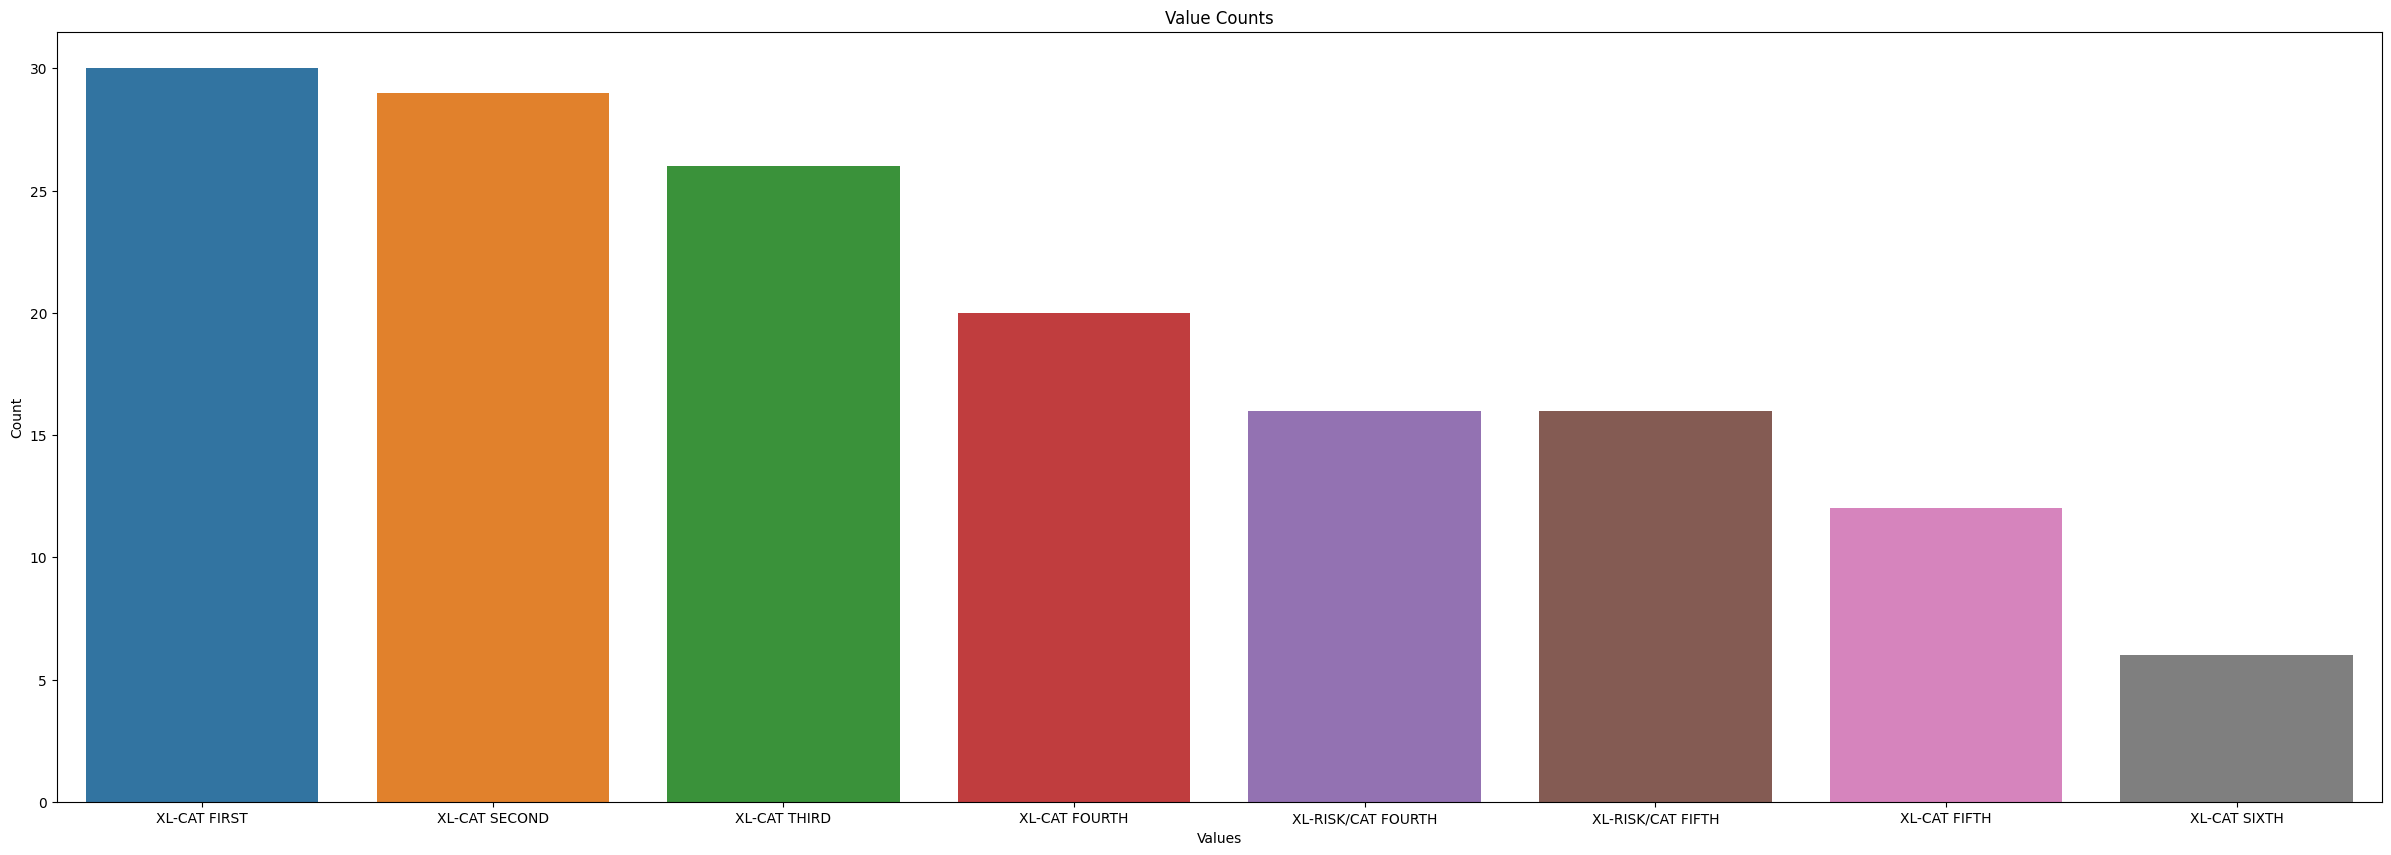

In [39]:
# Create a list of values to filter, specifically anything related to CAT 
remove_list = ['XL-CAT THIRD','XL-CAT SECOND','XL-CAT FIRST','XL-CAT FOURTH','XL-CAT FIFTH','XL-RISK/CAT FOURTH','XL-RISK/CAT FIFTH','XL-CAT SIXTH']

# Remove rows based on the list of values
filtered_nepal_2018 = nepal_2018[nepal_2018['TYPE_OF_PARTICIPATION'].isin(remove_list)]
data = filtered_nepal_2018['TYPE_OF_PARTICIPATION']

# Compute value counts using pandas value_counts()
value_counts = data.value_counts()

# Create a bar plot using Seaborn's barplot()
plt.figure(figsize=(30,10))
sn.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and titles to the plot
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts')

# Display the plot
plt.show()



The frequency of each LOB is as follows  ACT_LOB
FIRE             90
WHOLE_ACCOUNT    65
Name: count, dtype: int64


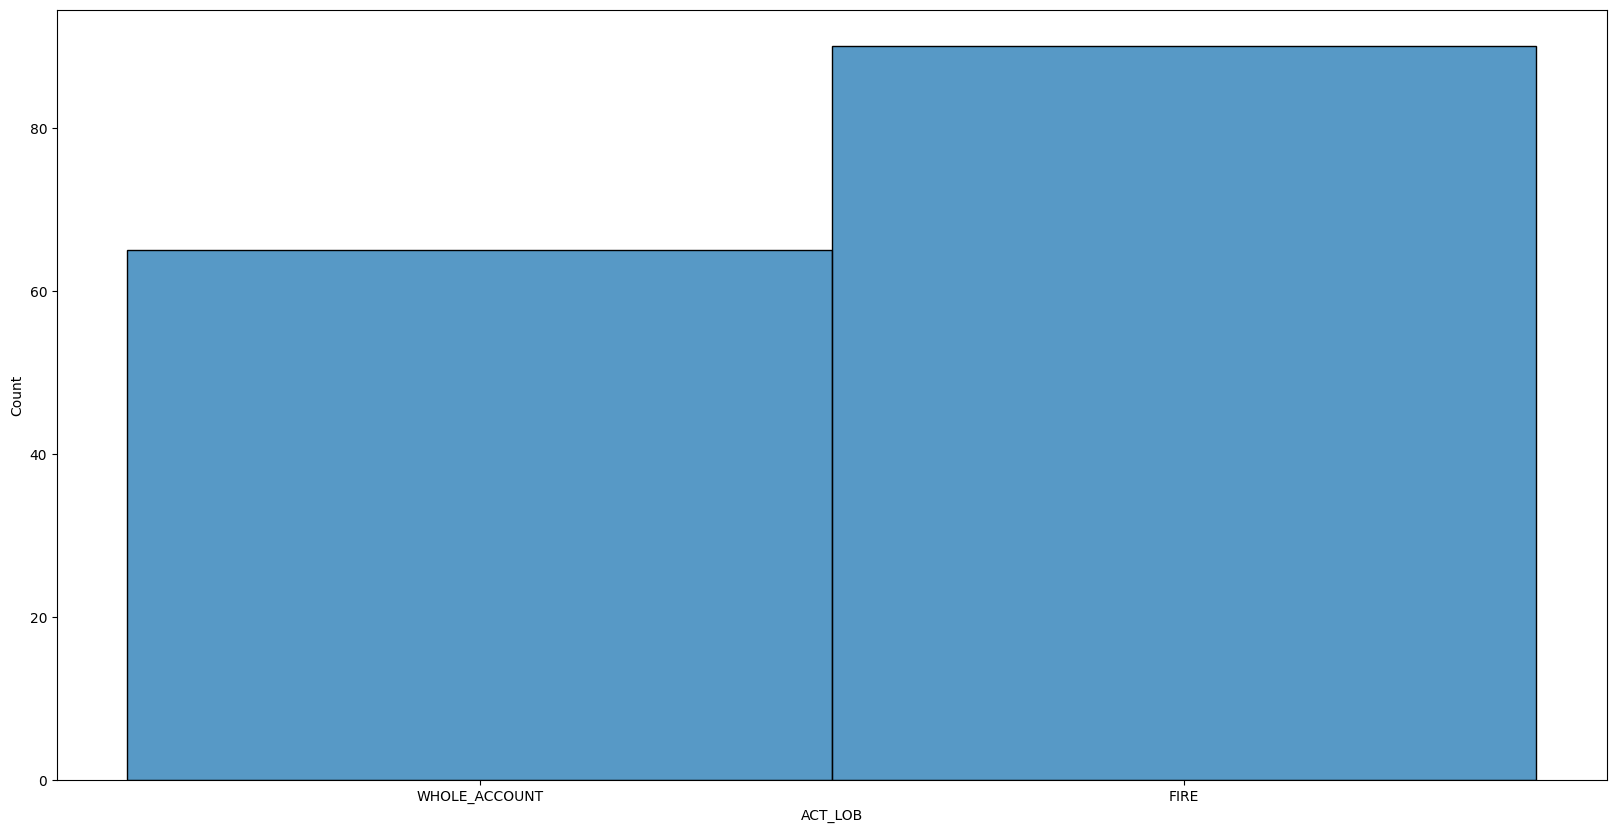

In [40]:
x = filtered_nepal_2018['ACT_LOB'].value_counts()
plt.figure(figsize=(20,10))
sn.histplot(filtered_nepal_2018['ACT_LOB'])
print('The frequency of each LOB is as follows ', x)

In [41]:
filtered_nepal_2018['Diff'].value_counts()
count_negative = (filtered_nepal_2018['Diff'] < 0).sum()
count_positive = (filtered_nepal_2018['Diff'] > 0).sum()
print('The number of negative difference values is: ',count_negative, 'and the number of positive values is: ',count_positive)
print('\n The are more positives than negatives')

The number of negative difference values is:  12 and the number of positive values is:  121

 The are more positives than negatives


### 2019

In [42]:
#CONTRACT_NO CEDENT_NAME
print('There are 272 unique contracts in 2019, from 17 cedants')
print('\n These are:', '\n\n\n The numbers on the right indicate the number of times the cedant name appears in the table')
nepal_2019['CEDENT_NAME'].value_counts()

There are 272 unique contracts in 2019, from 17 cedants

 These are: 


 The numbers on the right indicate the number of times the cedant name appears in the table


CEDENT_NAME
NEPAL INSURANCE LTD.                        184
NECO INSURANCE CO. LTD                      182
PRUDENTIAL INSURANCE CO LTD                 181
SIDDHARTHA INSURANCE CO. LTD. NEPAL         164
SANIMA INSURANCE COMPANY LIMITED            152
AJOD INSURANCE LIMITED, NEPAL               150
EVEREST INSURANCE CO.LTD                    132
IME GENERAL INSURANCE COMPANY,NEPAL         115
RASTRIYA BEEMA SANSTHAN                     114
HIMALAYAN GENERAL INSURANCE CO LTD          109
PREMIER INSURANCE CO.(NEPAL) LTD.           109
GENERAL INSURANCE COMPANY LIMITED, NEPAL    108
PRABHU INSURANCE LIMITED,NEPAL               95
Name: count, dtype: int64

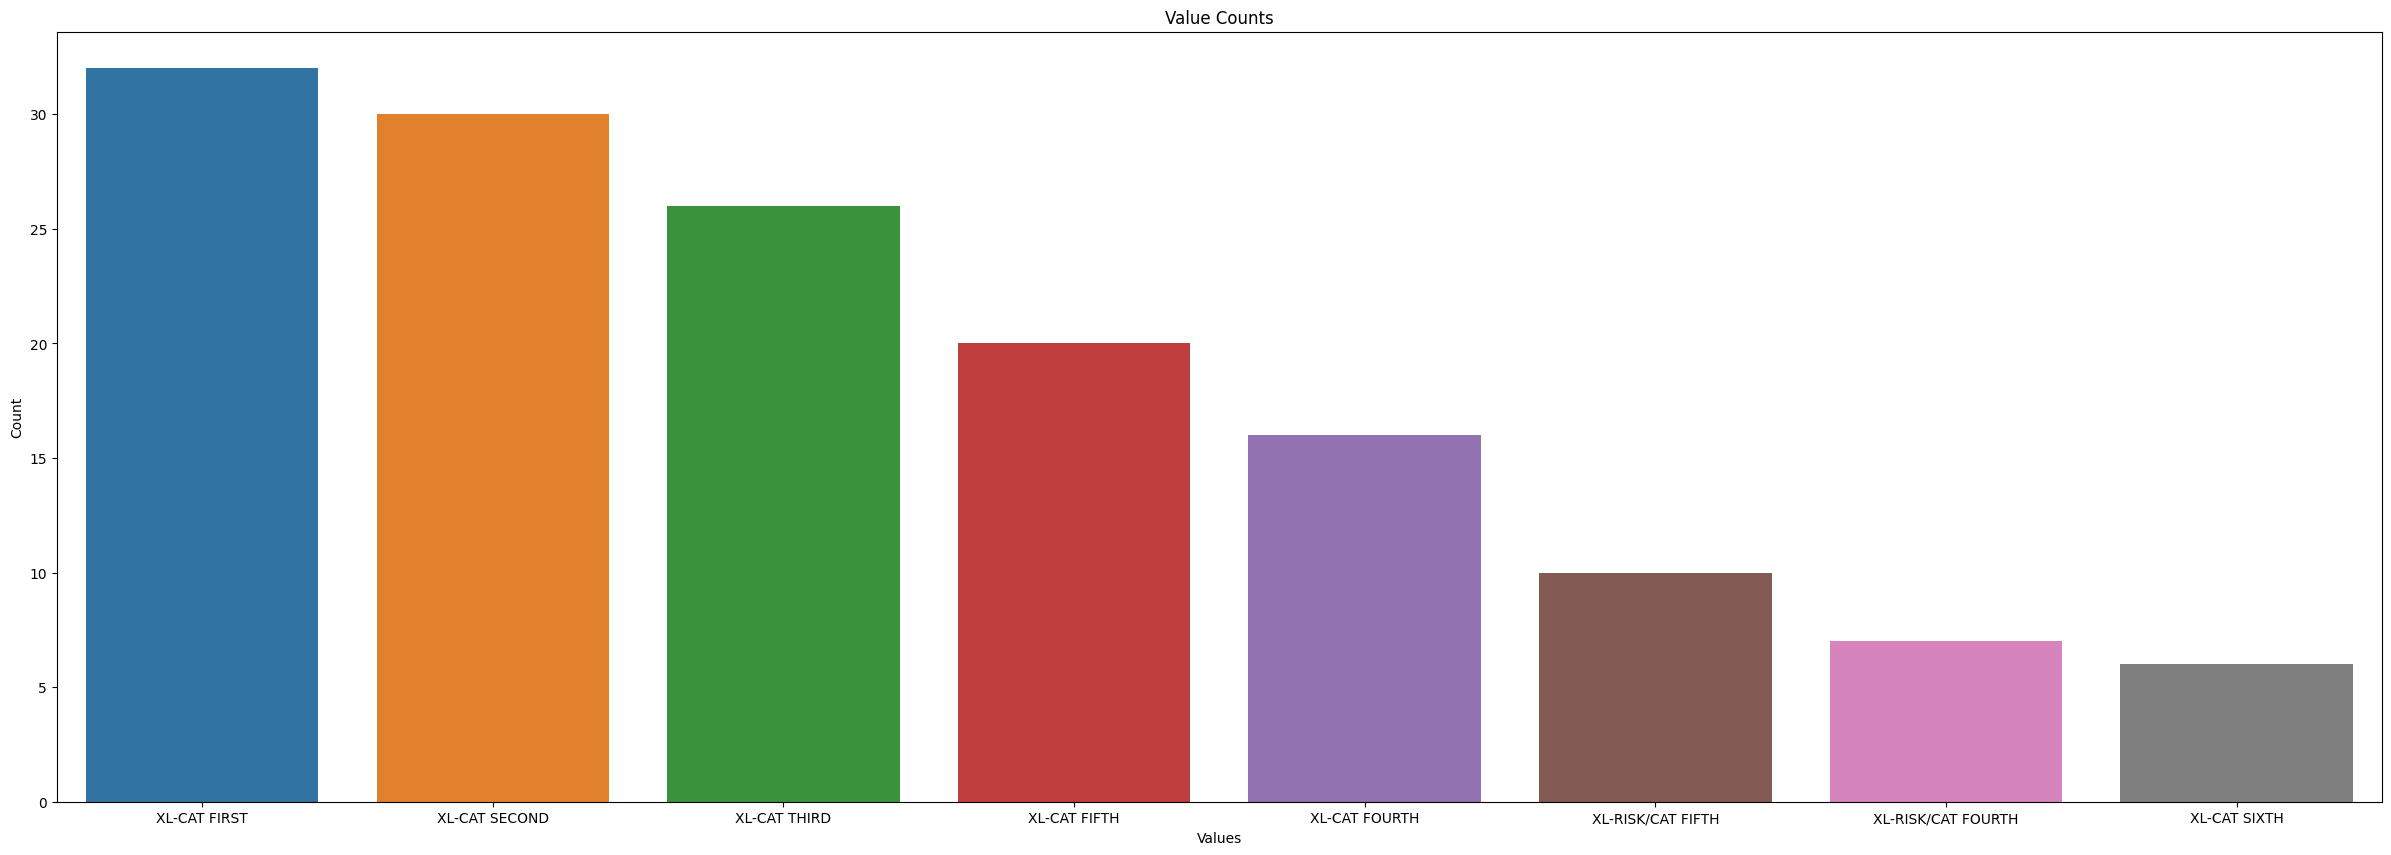

In [43]:
# Create a list of values to filter, specifically anything related to CAT 
remove_list = ['XL-CAT THIRD','XL-CAT SECOND','XL-CAT FIRST','XL-CAT FOURTH','XL-CAT FIFTH','XL-RISK/CAT FOURTH','XL-RISK/CAT FIFTH','XL-CAT SIXTH']

# Remove rows based on the list of values
filtered_nepal_2019 = nepal_2019[nepal_2019['TYPE_OF_PARTICIPATION'].isin(remove_list)]
data = filtered_nepal_2019['TYPE_OF_PARTICIPATION']

# Compute value counts using pandas value_counts()
value_counts = data.value_counts()

# Create a bar plot using Seaborn's barplot()
plt.figure(figsize=(30,10))
sn.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and titles to the plot
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts')

# Display the plot
plt.show()

The frequency of each LOB is as follows  ACT_LOB
FIRE             103
WHOLE_ACCOUNT     29
MOTOR             15
Name: count, dtype: int64


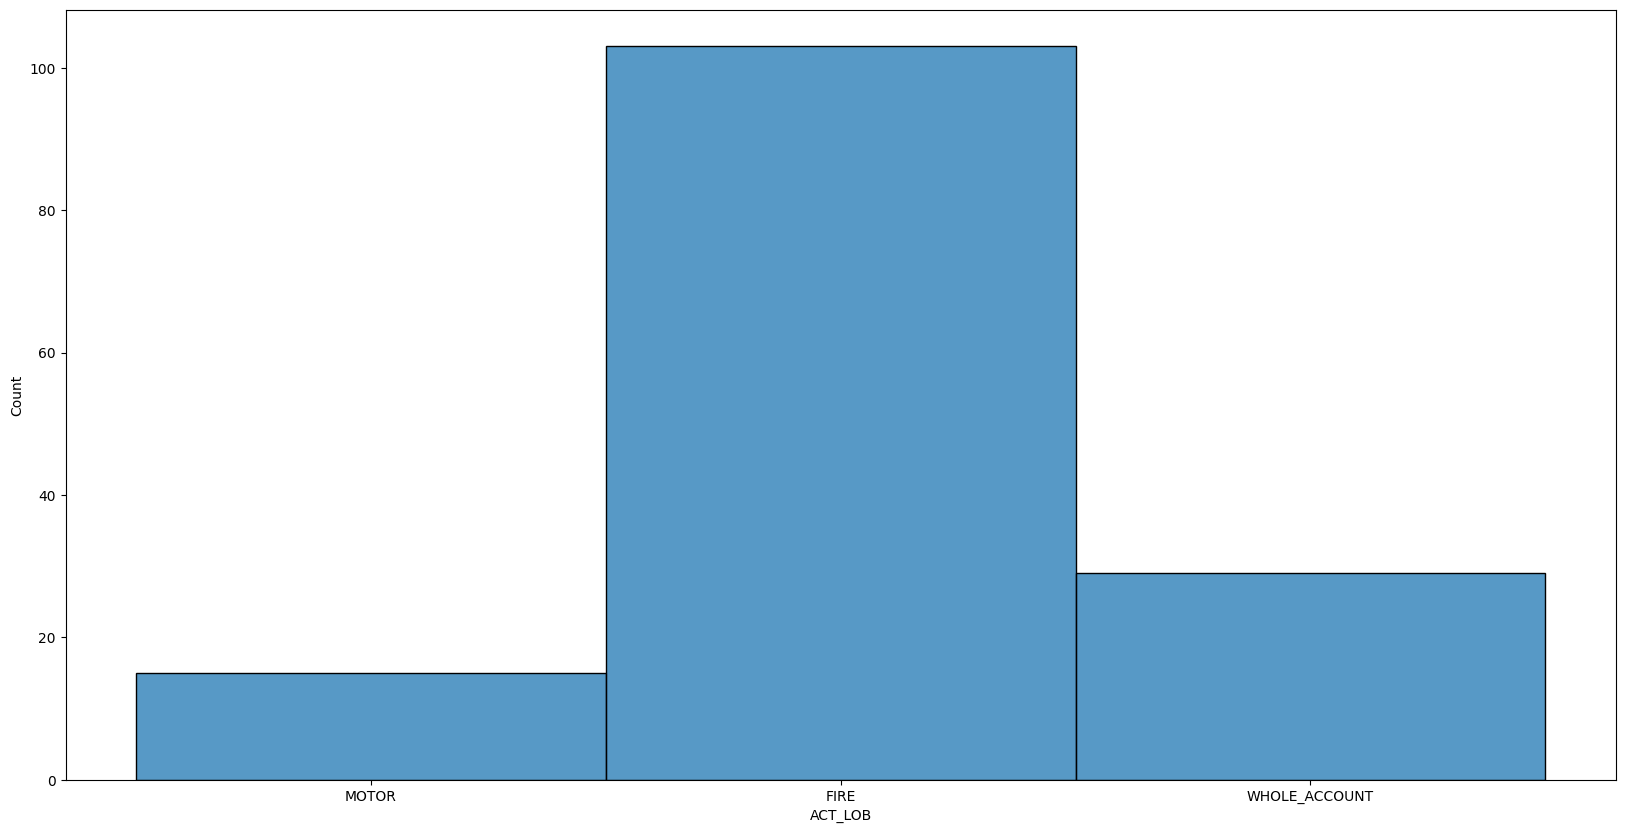

In [44]:
x = filtered_nepal_2019['ACT_LOB'].value_counts()
plt.figure(figsize=(20,10))
sn.histplot(filtered_nepal_2019['ACT_LOB'])
print('The frequency of each LOB is as follows ', x)

In [45]:
filtered_nepal_2019['Diff'].value_counts()
count_negative = (filtered_nepal_2019['Diff'] < 0).sum()
count_positive = (filtered_nepal_2019['Diff'] > 0).sum()
print('The number of negative difference values is: ',count_negative, 'and the number of positive values is: ',count_positive)
print('\n The are more positives than negatives')



The number of negative difference values is:  6 and the number of positive values is:  121

 The are more positives than negatives


### 2020

In [46]:
#CONTRACT_NO CEDENT_NAME
print('There are 315 unique contracts in 2020, from 17 cedants')
print('\n These are:', '\n\n\n The numbers on the right indicate the number of times the cedant name appears in the table')
nepal_2020['CEDENT_NAME'].value_counts()

There are 315 unique contracts in 2020, from 17 cedants

 These are: 


 The numbers on the right indicate the number of times the cedant name appears in the table


CEDENT_NAME
SANIMA INSURANCE COMPANY LIMITED            144
NEPAL INSURANCE LTD.                        141
SIDDHARTHA INSURANCE CO. LTD. NEPAL         131
GENERAL INSURANCE COMPANY LIMITED, NEPAL    129
PRUDENTIAL INSURANCE CO LTD                 126
NECO INSURANCE CO. LTD                      121
AJOD INSURANCE LIMITED, NEPAL               120
PRABHU INSURANCE LIMITED,NEPAL              105
IME GENERAL INSURANCE COMPANY,NEPAL          89
RASTRIYA BEEMA SANSTHAN                      82
EVEREST INSURANCE CO.LTD                     78
HIMALAYAN GENERAL INSURANCE CO LTD           75
PREMIER INSURANCE CO.(NEPAL) LTD.            69
Name: count, dtype: int64

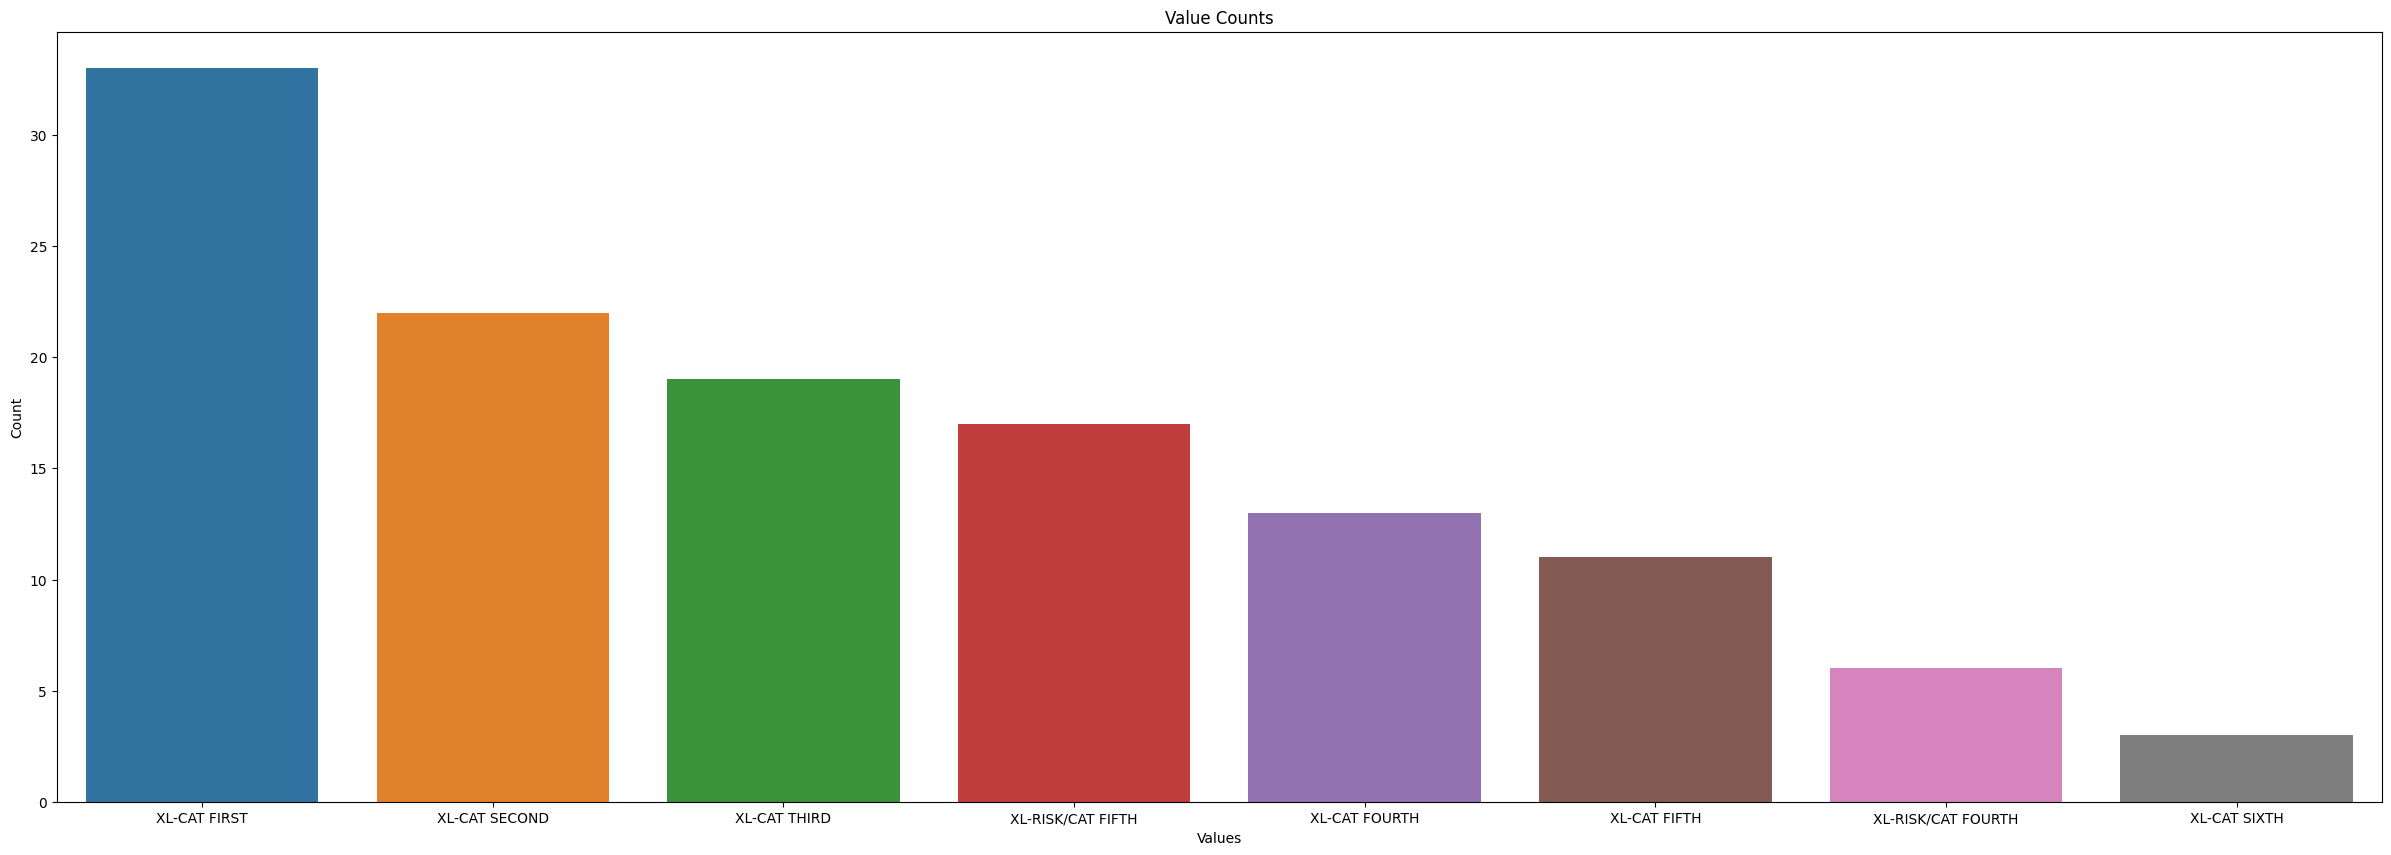

In [47]:
# Create a list of values to filter, specifically anything related to CAT 
remove_list = ['XL-CAT THIRD','XL-CAT SECOND','XL-CAT FIRST','XL-CAT FOURTH','XL-CAT FIFTH','XL-RISK/CAT FOURTH','XL-RISK/CAT FIFTH','XL-CAT SIXTH']

# Remove rows based on the list of values
filtered_nepal_2020 = nepal_2020[nepal_2020['TYPE_OF_PARTICIPATION'].isin(remove_list)]
data = filtered_nepal_2020['TYPE_OF_PARTICIPATION']

# Compute value counts using pandas value_counts()
value_counts = data.value_counts()

# Create a bar plot using Seaborn's barplot()
plt.figure(figsize=(30,10))
sn.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and titles to the plot
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts')

# Display the plot
plt.show()



The frequency of each LOB is as follows  ACT_LOB
FIRE             73
WHOLE_ACCOUNT    39
MOTOR            12
Name: count, dtype: int64


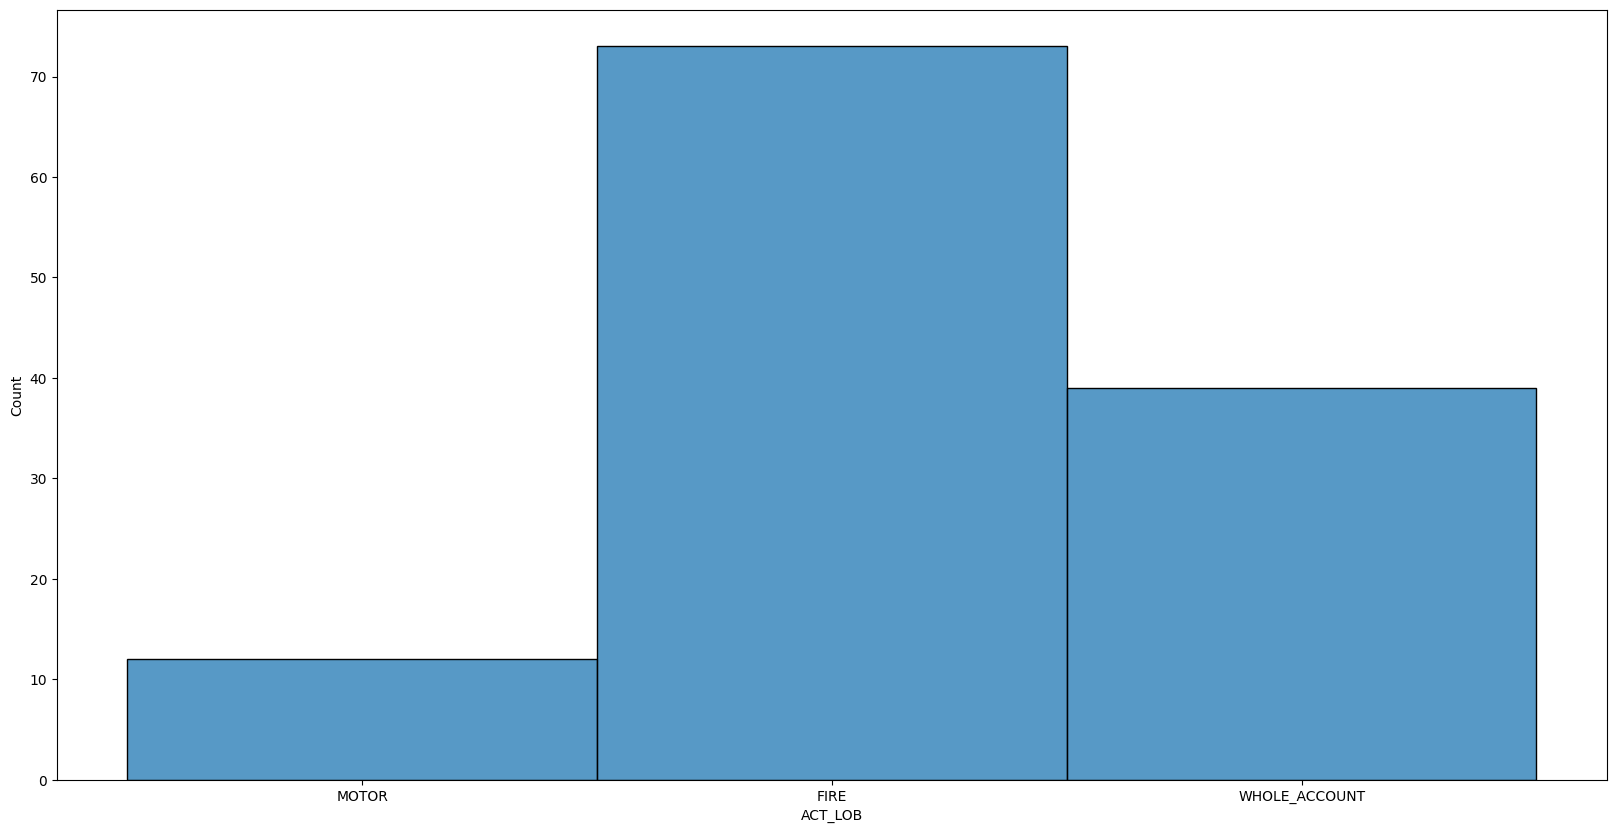

In [48]:
x = filtered_nepal_2020['ACT_LOB'].value_counts()
plt.figure(figsize=(20,10))
sn.histplot(filtered_nepal_2020['ACT_LOB'])
print('The frequency of each LOB is as follows ', x)

In [49]:
filtered_nepal_2020['Diff'].value_counts()
count_negative = (filtered_nepal_2020['Diff'] < 0).sum()
count_positive = (filtered_nepal_2020['Diff'] > 0).sum()
print('The number of negative difference values is: ',count_negative, 'and the number of positive values is: ',count_positive)
print('\n The are more positives than negatives')



The number of negative difference values is:  9 and the number of positive values is:  98

 The are more positives than negatives


### 2021

In [50]:
#CONTRACT_NO CEDENT_NAME
print('There are 352 unique contracts in 2021, from 16 cedants')
print('\n These are:', '\n\n\n The numbers on the right indicate the number of times the cedant name appears in the table')
nepal_2021['CEDENT_NAME'].value_counts()

There are 352 unique contracts in 2021, from 16 cedants

 These are: 


 The numbers on the right indicate the number of times the cedant name appears in the table


CEDENT_NAME
PRUDENTIAL INSURANCE CO LTD                 174
SIDDHARTHA INSURANCE CO. LTD. NEPAL         114
HIMALAYAN GENERAL INSURANCE CO LTD          105
PRABHU INSURANCE LIMITED,NEPAL               96
IME GENERAL INSURANCE COMPANY,NEPAL          95
GENERAL INSURANCE COMPANY LIMITED, NEPAL     83
NECO INSURANCE CO. LTD                       82
EVEREST INSURANCE CO.LTD                     81
AJOD INSURANCE LIMITED, NEPAL                79
RASTRIYA BEEMA SANSTHAN                      75
NEPAL INSURANCE LTD.                         68
PREMIER INSURANCE CO.(NEPAL) LTD.            47
Name: count, dtype: int64

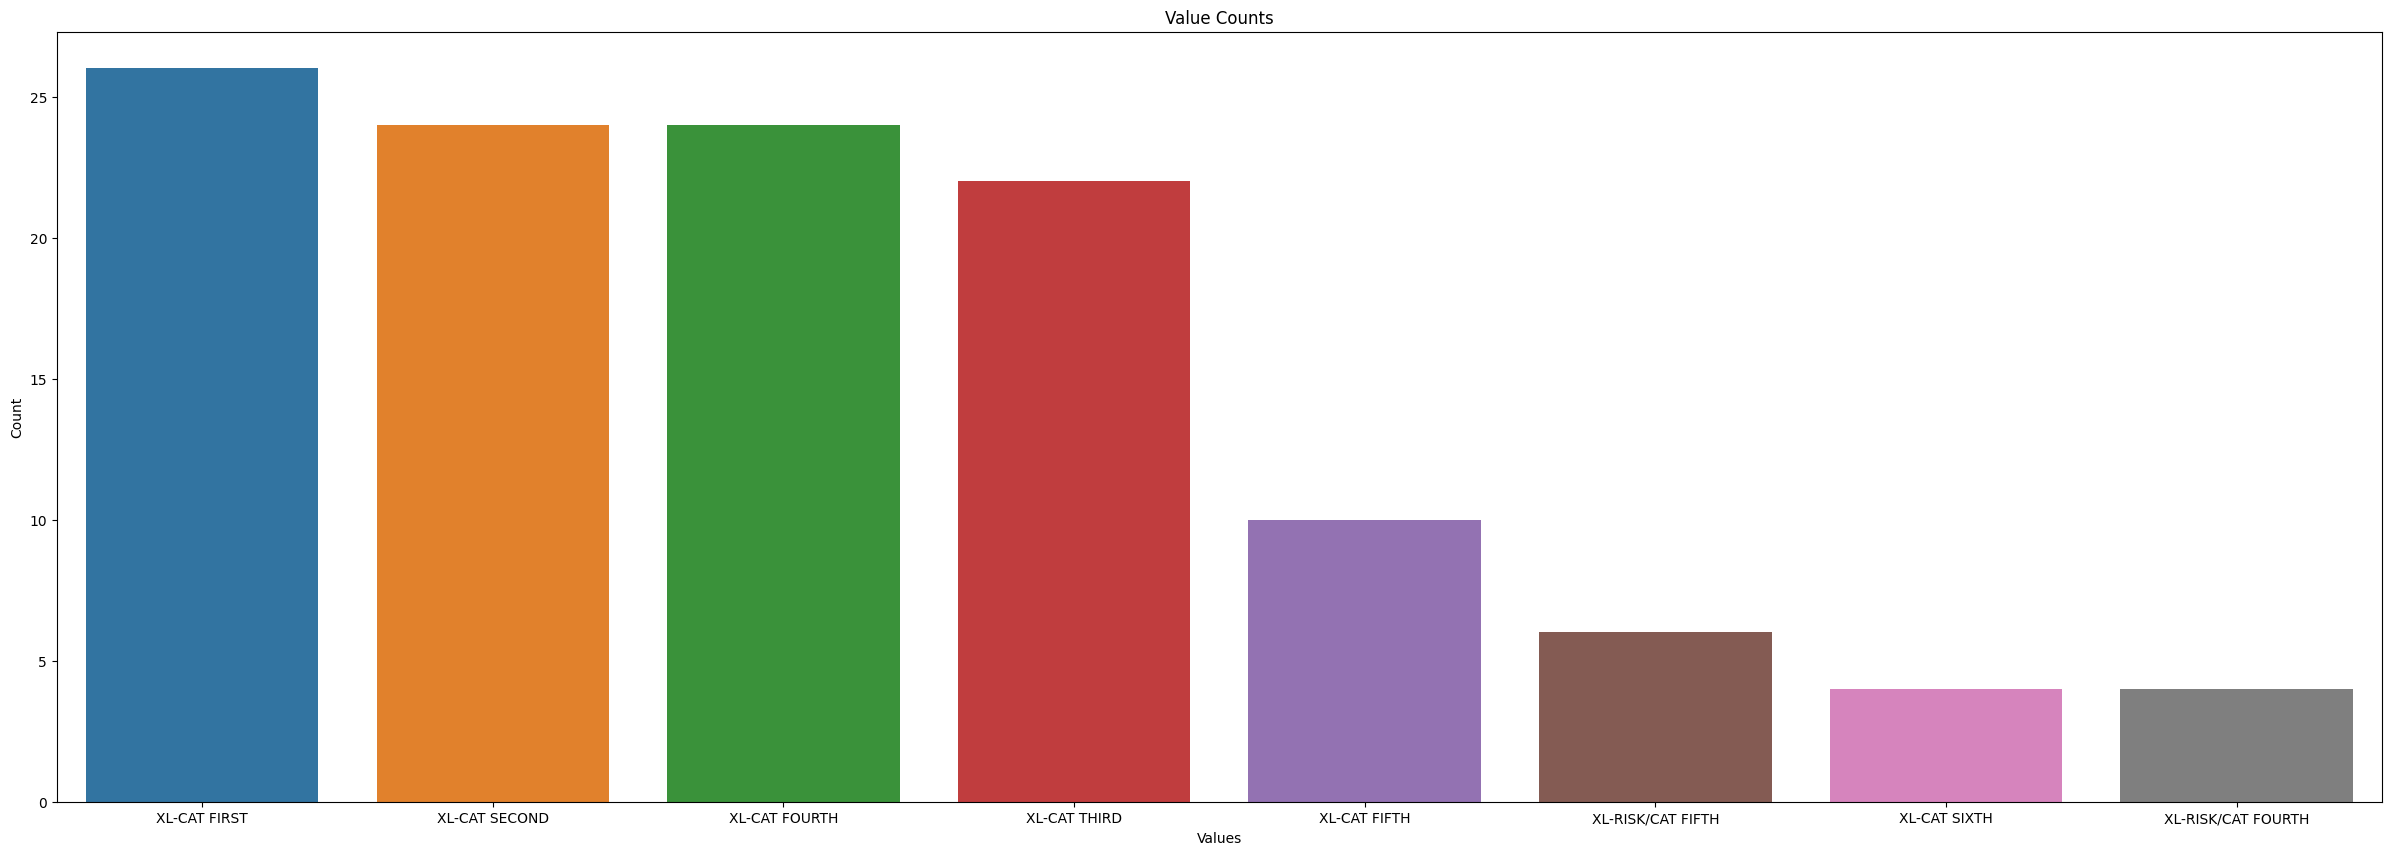

In [51]:
# Create a list of values to filter, specifically anything related to CAT 
remove_list = ['XL-CAT THIRD','XL-CAT SECOND','XL-CAT FIRST','XL-CAT FOURTH','XL-CAT FIFTH','XL-RISK/CAT FOURTH','XL-RISK/CAT FIFTH','XL-CAT SIXTH']

# Remove rows based on the list of values
filtered_nepal_2021 = nepal_2021[nepal_2021['TYPE_OF_PARTICIPATION'].isin(remove_list)]
data = filtered_nepal_2021['TYPE_OF_PARTICIPATION']

# Compute value counts using pandas value_counts()
value_counts = data.value_counts()

# Create a bar plot using Seaborn's barplot()
plt.figure(figsize=(30,10))
sn.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and titles to the plot
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts')

# Display the plot
plt.show()



The frequency of each LOB is as follows  ACT_LOB
FIRE             62
WHOLE_ACCOUNT    50
MOTOR             8
Name: count, dtype: int64


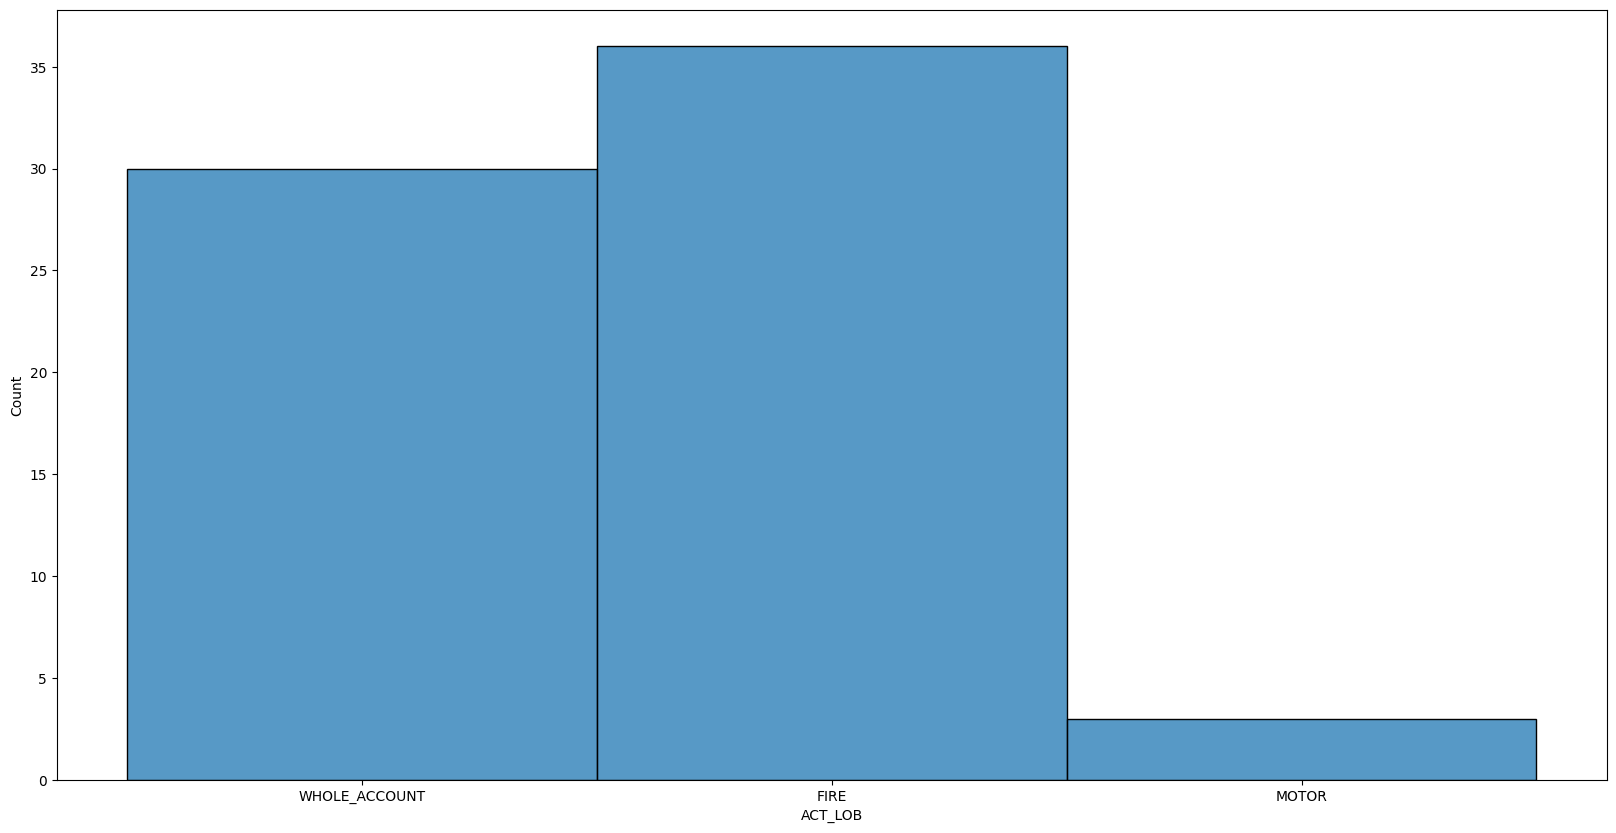

In [52]:

plt.figure(figsize=(20,10))
sn.histplot(filtered_nepal_2015['ACT_LOB'])
x = filtered_nepal_2021['ACT_LOB'].value_counts()
print('The frequency of each LOB is as follows ', x)

In [53]:
filtered_nepal_2021['Diff'].value_counts()
count_negative = (filtered_nepal_2021['Diff'] < 0).sum()
count_positive = (filtered_nepal_2021['Diff'] > 0).sum()
print('The number of negative difference values is: ',count_negative, 'and the number of positive values is: ',count_positive)
print('\n The are more positives than negatives')



The number of negative difference values is:  9 and the number of positive values is:  111

 The are more positives than negatives


### 2022

In [54]:
#CONTRACT_NO CEDENT_NAME
print('There are 150 unique contracts in 2022, from 11 cedants')
print('\n These are:', '\n\n\n The numbers on the right indicate the number of times the cedant name appears in the table')
nepal_2022['CEDENT_NAME'].value_counts()

There are 150 unique contracts in 2022, from 11 cedants

 These are: 


 The numbers on the right indicate the number of times the cedant name appears in the table


CEDENT_NAME
IME GENERAL INSURANCE COMPANY,NEPAL         46
PRABHU INSURANCE LIMITED,NEPAL              43
HIMALAYAN GENERAL INSURANCE CO LTD          42
GENERAL INSURANCE COMPANY LIMITED, NEPAL    41
PRUDENTIAL INSURANCE CO LTD                 34
PREMIER INSURANCE CO.(NEPAL) LTD.           33
AJOD INSURANCE LIMITED, NEPAL               32
SIDDHARTHA INSURANCE CO. LTD. NEPAL         29
RASTRIYA BEEMA SANSTHAN                     24
NECO INSURANCE CO. LTD                      23
NEPAL INSURANCE LTD.                        22
Name: count, dtype: int64

In [78]:
# Remove rows based on the list of values
filtered_nepal_2022 = nepal_2022[nepal_2022['TYPE_OF_PARTICIPATION'].isin(remove_list)]
filtered_nepal_2022 = nepal_2022.loc[nepal_2022['TYPE_OF_PARTICIPATION'].isin(['XL-CAT THIRD','XL-CAT SECOND','XL-CAT FIRST','XL-CAT FOURTH','XL-CAT FIFTH','XL-RISK/CAT FOURTH','XL-RISK/CAT FIFTH','XL-CAT SIXTH'])]

data = filtered_nepal_2022['TYPE_OF_PARTICIPATION']

# Compute value counts using pandas value_counts()
value_counts = data.value_counts()
filtered_nepal_2022

# Create a bar plot using Seaborn's barplot()
#plt.figure(figsize=(30,10))
#sn.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and titles to the plot
#plt.xlabel('Values')
#plt.ylabel('Count')
#plt.title('Value Counts')

# Display the plot
#plt.show()



,CONTRACT_NO,UNDERWRITING_YEAR,IS_INWARD,INCEPTION_DATE,EXPIRY_DATE,TYPE_OF_BUSINESS,ACT_LOB,CEDENT_ID,CEDENT_NAME,BROKER_ID,...,LOSS_PORTFORLIO_RETAINED,LOSS_PORTFORLIO_RELEASED,CASH_LOSS_REFUND,PREMIUM_PORTFOLIO,CLAIM_RESERVE,SYSTEM,BUS_TYPE,Inflows,Outflows,Diff


The frequency of each LOB is as follows  Series([], Name: count, dtype: int64)


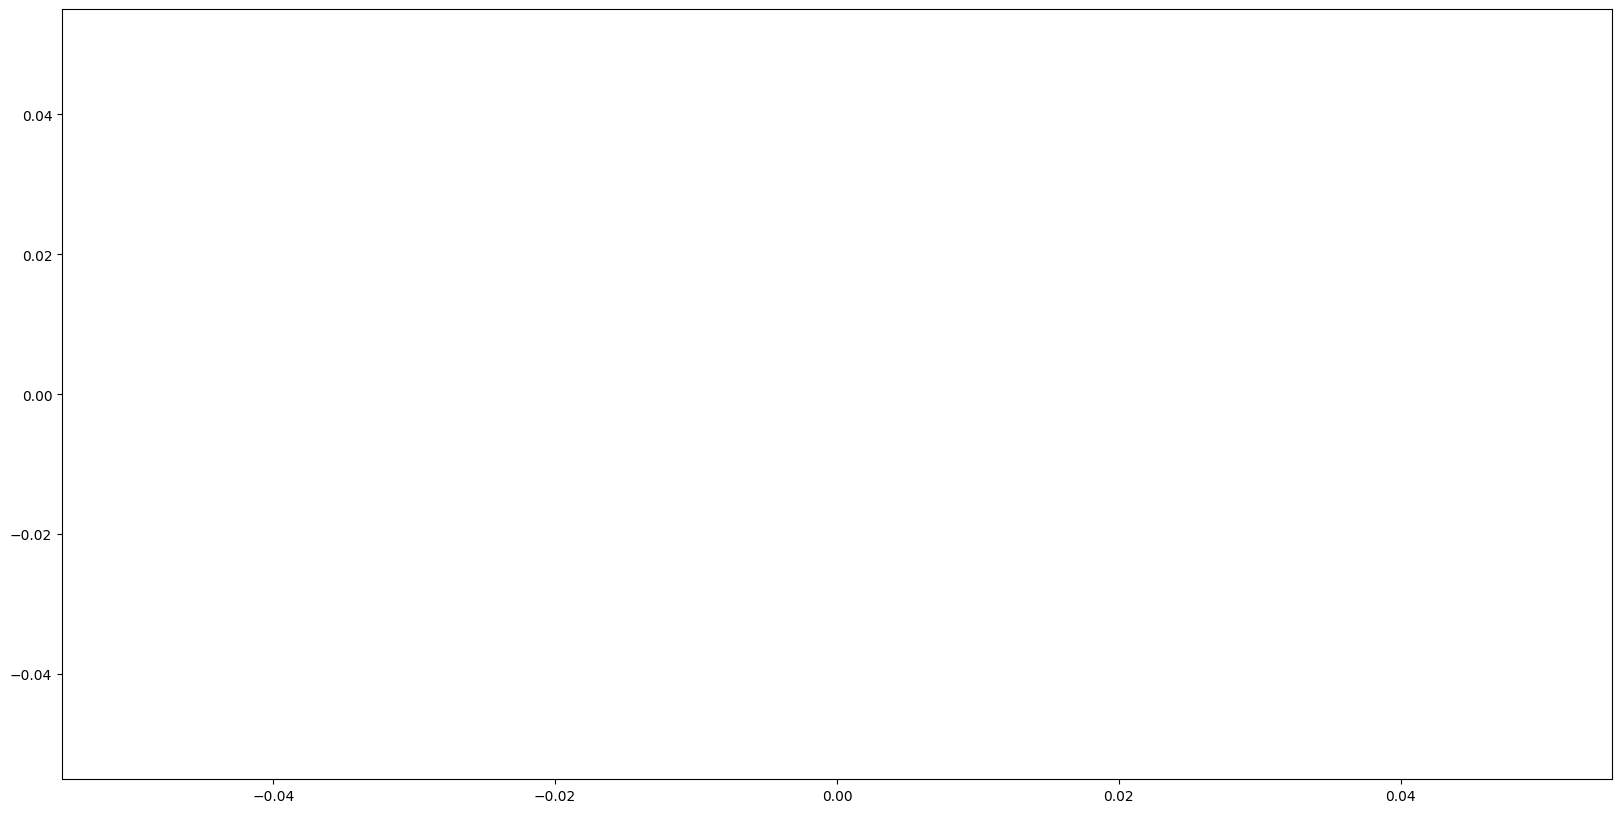

In [61]:
x = filtered_nepal_2022['ACT_LOB'].value_counts()
plt.figure(figsize=(20,10))
sn.histplot(filtered_nepal_2022['ACT_LOB'])
print('The frequency of each LOB is as follows ', x)


In [ ]:
filtered_nepal_2022['Diff'].value_counts()
count_negative = (filtered_nepal_2022['Diff'] < 0).sum()
count_positive = (filtered_nepal_2022['Diff'] > 0).sum()
print('The number of negative difference values is: ',count_negative, 'and the number of positive values is: ',count_positive)
print('\n The are more  positives than negatives')

The number of negative difference values is:  28 and the number of positive values is:  341

 The are more  positives than negatives


In [72]:
#nepal_only = nepal_only[nepal_2022['TYPE_OF_PARTICIPATION'].isin(remove_list)]

filtered_df = nepal_only.loc[nepal_only['TYPE_OF_PARTICIPATION'].isin(['XL-CAT THIRD','XL-CAT SECOND','XL-CAT FIRST','XL-CAT FOURTH','XL-CAT FIFTH','XL-RISK/CAT FOURTH','XL-RISK/CAT FIFTH','XL-CAT SIXTH'])]
filtered_df

,CONTRACT_NO,UNDERWRITING_YEAR,IS_INWARD,INCEPTION_DATE,EXPIRY_DATE,TYPE_OF_BUSINESS,ACT_LOB,CEDENT_ID,CEDENT_NAME,BROKER_ID,...,LOSS_PORTFORLIO_RETAINED,LOSS_PORTFORLIO_RELEASED,CASH_LOSS_REFUND,PREMIUM_PORTFOLIO,CLAIM_RESERVE,SYSTEM,BUS_TYPE,Inflows,Outflows,Diff
45709,94003,2015,Y,2015-07-17 00:00:00,2016-07-16 00:00:00,NON-PROPORTIONAL,WHOLE_ACCOUNT,MNP009,PRUDENTIAL INSURANCE CO LTD,B65JBB,...,0.0,0.0,0.0,0.0,0.0,RMS,P&C,22813.0,2851.0,19962.0
45710,94003,2015,Y,2015-07-17 00:00:00,2016-07-16 00:00:00,NON-PROPORTIONAL,WHOLE_ACCOUNT,MNP009,PRUDENTIAL INSURANCE CO LTD,B65JBB,...,0.0,0.0,0.0,0.0,0.0,RMS,P&C,22813.0,2851.0,19962.0
45711,94003,2015,Y,2015-07-17 00:00:00,2016-07-16 00:00:00,NON-PROPORTIONAL,WHOLE_ACCOUNT,MNP009,PRUDENTIAL INSURANCE CO LTD,B65JBB,...,0.0,0.0,0.0,0.0,0.0,RMS,P&C,9475.0,1184.0,8291.0
45712,94003,2016,Y,2016-07-16 00:00:00,2017-07-16 00:00:00,NON-PROPORTIONAL,WHOLE_ACCOUNT,MNP009,PRUDENTIAL INSURANCE CO LTD,B65JBB,...,0.0,0.0,0.0,0.0,0.0,RMS,P&C,28688.0,3586.0,25102.0
45713,94003,2016,Y,2016-07-16 00:00:00,2017-07-16 00:00:00,NON-PROPORTIONAL,WHOLE_ACCOUNT,MNP009,PRUDENTIAL INSURANCE CO LTD,B65JBB,...,0.0,0.0,0.0,0.0,0.0,RMS,P&C,28688.0,3586.0,25102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190286,791063,2021,Y,2021-07-16 00:00:00,2022-07-15 00:00:00,NON-PROPORTIONAL,FIRE,MNP012,SIDDHARTHA INSURANCE CO. LTD. NEPAL,B65JBB,...,0.0,0.0,0.0,0.0,0.0,RMS,P&C,233750.0,25713.0,208037.0
190290,791336,2021,Y,2021-07-16 00:00:00,2022-07-15 00:00:00,NON-PROPORTIONAL,FIRE,FNP004,NECO INSURANCE CO. LTD,B65JBB,...,0.0,0.0,0.0,0.0,0.0,RMS,P&C,160701.0,18481.0,142220.0
190291,791336,2021,Y,2021-07-16 00:00:00,2022-07-15 00:00:00,NON-PROPORTIONAL,FIRE,FNP004,NECO INSURANCE CO. LTD,B65JBB,...,0.0,0.0,0.0,0.0,0.0,RMS,P&C,378120.0,43484.0,334636.0
190292,791336,2021,Y,2021-07-16 00:00:00,2022-07-15 00:00:00,NON-PROPORTIONAL,FIRE,FNP004,NECO INSURANCE CO. LTD,B65JBB,...,0.0,0.0,0.0,0.0,0.0,RMS,P&C,-378120.0,-43484.0,-334636.0


<Axes: xlabel='Diff', ylabel='Density'>

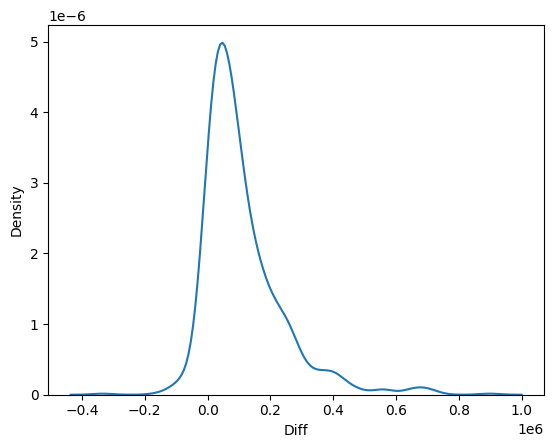

In [73]:
sn.kdeplot(filtered_df['Diff'])

c:\Users\tkmwangi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


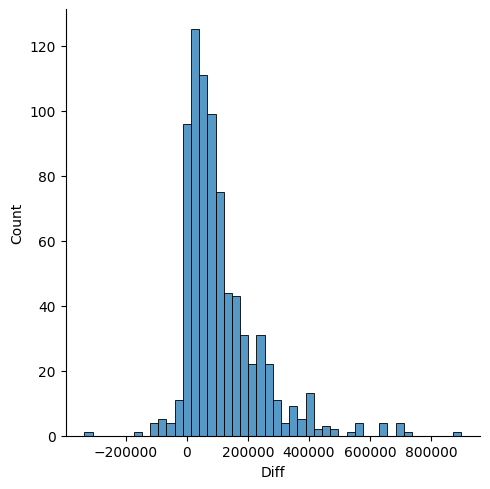

In [74]:
sn.displot(filtered_df['Diff'])